# 🏬 **TASACIÓN DE INMUEBLES** 🏢

Esta base de datos proviene de *zonaprop.com.ar*, contiene datos de las casas a
la venta en julio del 2022, en la Ciudad de Córdoba.

El objetivo es crear un
modelo hedónico de precios que permita tasar inmuebles.

Para llevar a cabo el proceso de predicción, y dado el volumen de los datos y el trabajo realizado, este se ha dividido en **6 partes**, los cuales son:


1.   LIMPIEZA / CURADURÍA DE DATOS 🧹
2.   PREPARACIÓN DE LOS DATOS 🔖
3.   ANÁLISIS ESTADÍSTICO / PRUEBAS ECONOMÉTRICAS 📊
4.   MODELOS DE PREDICCIÓN 📈
5.   CONCLUSIONES ✅
6.   VISUALIZACIÓN DE COORDENADAS 🏹

En esta primera parte se dará inicio con:

### ***1 LIMPIEZA / CURADURÍA DE DATOS 🧹***

#### ***1.1 Librerías utilizadas***

In [ ]:
# -> Librerías de uso básico
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -> Librerías Complementarias
import sys
import csv
import chardet
from pathlib import Path

#!pip install plotly==5.3.1
import plotly.express as px                 # Librería que permite realizar visualizaciones interactivas
                                            # Algunas funciones usadas se encuentran en versiones más actuales: desde la  4.12.0
                                            # Si tiene una versión anterior, instalar: !pip install plotly==5.3.1
#Regresion Simple
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Polinomial
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Regresion lineal multiple
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm                # modelos estadísticos
import statsmodels.stats.api as sms         # módulo stats de statsmodels
import matplotlib.pyplot as plt             # gráficos básicos
import seaborn as sns                       # gráficos más avanzados
%matplotlib inline
plt.style.use("seaborn-white")

<ipython-input-1-07c895f51320>:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


#### ***1.2 Carga de base de datos***

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1mfj3XXCnDjJcmSC9I4a4dwTIFI2uC34E/edit?usp=drive_link&ouid=109033079849202436389&rtpof=true&sd=true"
file_id=url.split('/')[-2]
path='https://drive.google.com/uc?id=' + file_id

Almacenaje de la Database en la variable **df**

In [ ]:
df = pd.read_excel(path)

#### ***1.3 Visualización del dataset***

Observación aleatoria de 5 filas del Dataset.


In [ ]:
df.sample(5)

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,Ambientes,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng
3850,47619823,145000,Duplex de 3 Dorm. Impecable en Bº Jardin,DUPLEX CON EXCELENTE UBICACION A 5 MINUTOS DE ...,"DE LA INDUSTRIA, Jardín, Córdoba",Jardín,NaN,140.0,2.0,NaN,5.0,6.0,0,1.0,0,0,NaN,-3.144269e+16,-6.418305e+16
3491,48386211,102000,Venta Propiedad en Villa Rivera Indarte,Propiedad en dos plantas con lindo patio. Plan...,"iglesia vieja, Villa Rivera Indarte, Córdoba",Villa Rivera Indarte,560.0,120.0,2.0,3.0,NaN,8.0,0,1.0,0,0,NaN,-3.132112e+16,-6.429358e+16
883,49257709,640000,Casa en Venta en Villa Belgrano | Importante E...,Importante casa de categoría en venta en Villa...,"Av Recta Martinolli 6225, Villa Belgrano, Córdoba",Villa Belgrano,1477.0,858.0,10.0,4.0,12.0,NaN,1,6.0,0,0,NaN,-3.134938e+16,-6.425345e+16
6579,49457188,55000,Vende Casa + Duplex en Barrio Cabildo,Corredor Responsable: Mariana Carrizo CPCPI 52...,"Bernasconi 2200, Cabildo, Córdoba",Cabildo,300.0,158.0,2.0,3.0,7.0,38.0,0,NaN,0,0,NaN,-3.148380e+16,-6.423689e+16
7262,49696811,30000,Casa en Venta Barrio Jardin Excelente Ubicacion,Corredor Responsable: Carlos Borra CPCPI 4900 ...,"Avendaño y Valdivia 3100, Jardín, Córdoba",Jardín,38.0,32.0,1.0,1.0,2.0,27.0,0,NaN,0,0,NaN,-3.144854e+16,-6.417555e+16


Información sobre las variables y características del Dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idPost           7966 non-null   int64  
 1   Precio           7966 non-null   int64  
 2   title            7966 non-null   object 
 3   Description      7957 non-null   object 
 4   direccion        7927 non-null   object 
 5   barrio           7927 non-null   object 
 6   m2total          7818 non-null   float64
 7   m2cubierto       7686 non-null   float64
 8   Banos            7703 non-null   float64
 9   Dormitorios      7732 non-null   float64
 10  Ambientes        6881 non-null   float64
 11  Antiguedad       5392 non-null   float64
 12  Estrenar         7966 non-null   int64  
 13  Cochera          5706 non-null   float64
 14  Estado           7966 non-null   int64  
 15  Luminoso         7966 non-null   int64  
 16  Toilette         1705 non-null   float64
 17  coordenadas.la

Observación de las medidas descriptivas del Dataset


In [ ]:
df.describe()

,idPost,Precio,m2total,m2cubierto,Banos,Dormitorios,Ambientes,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng
count,7.966000e+03,7.966000e+03,7.818000e+03,7686.000000,7703.000000,7732.000000,6881.000000,5392.000000,7966.000000,5706.000000,7966.000000,7966.000000,1705.000000,7.902000e+03,7.902000e+03
mean,4.807220e+07,1.950991e+05,2.798552e+03,212.350768,2.359211,3.101009,5.265514,37.027819,0.380115,1.710480,0.022847,0.176375,1.069795,-3.132207e+16,-6.418906e+16
std,1.714621e+06,1.778487e+05,1.439366e+05,141.451717,1.101984,0.986398,2.690258,156.574038,0.485445,0.879179,0.149425,0.381162,0.372700,2.491428e+15,2.051459e+15
min,3.304238e+07,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-3.841610e+16,-1.178677e+17
25%,4.726492e+07,9.000000e+04,1.800000e+02,129.250000,2.000000,3.000000,4.000000,9.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-3.144672e+16,-6.425966e+16
50%,4.858316e+07,1.400000e+05,2.820000e+02,175.000000,2.000000,3.000000,5.000000,20.000000,0.000000,2.000000,0.000000,0.000000,1.000000,-3.139790e+16,-6.422309e+16
75%,4.941782e+07,2.300000e+05,4.722500e+02,260.000000,3.000000,3.000000,6.000000,40.000000,1.000000,2.000000,0.000000,0.000000,1.000000,-3.136298e+16,-6.418673e+16
max,4.991312e+07,2.500000e+06,9.000000e+06,5000.000000,14.000000,23.000000,40.000000,2016.000000,1.000000,12.000000,1.000000,1.000000,11.000000,4.549349e+16,1.224632e+16


Identificación del tamaño original del dataset

In [ ]:
df.shape

(7966, 19)

#### ***1.4 🔍 Análisis Exploratorio de los Datos***

Por medio del *análisis exploratorio de datos* **EDA** se explora y visualiza los datos con el fin de identificar patrones, tendencias, relaciones y posibles anomalías. Esto ayudará a comprender la distribución de los datos, detectar valores atípicos y determinar la naturaleza de la relación entre las variables.

##### ***1.4.1 Limpieza Feature IdPost***

Identificación booleana de valores duplicados de la Variable **IdPost**

In [ ]:
df.duplicated('idPost')

0       False
1       False
2       False
3       False
4       False
        ...  
7961     True
7962    False
7963    False
7964     True
7965    False
Length: 7966, dtype: bool

Visualización de algunos de los valores duplicados de la varible **IdPost**

In [ ]:
df[df.duplicated('idPost')]

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,Ambientes,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng
226,47357831,180000,Casa en Venta de 3 Dorm. C/ Cochera en Alta Có...,Excelente casa en venta ubicada en Alta Córdob...,"Mariano Fragueiro 3140, Alta Córdoba, Córdoba",Alta Córdoba,300.0,250.0,2.0,3.0,4.0,0.0,1,1.0,0,0,NaN,-3.137332e+16,-6.416205e+16
232,47485627,330000,Cuatro Hojas Country - Casa en Venta 3 Dorm,Hermosa casa en Country 4 Hojas. Ubicada en un...,"San José de Calasanz 2570, Mendiolaza, Cordoba...",Córdoba,1277.0,380.0,4.0,3.0,6.0,0.0,1,NaN,0,0,NaN,-3.125801e+16,-6.429997e+16
233,47315273,415000,Excelente Opoortunidad!,Imponente Propiedad. Enclavada en un terreno d...,"Gay Lussac 5200, Villa Belgrano, Córdoba",Villa Belgrano,1200.0,470.0,4.0,4.0,5.0,0.0,1,5.0,0,0,NaN,-3.135946e+16,-6.424502e+16
236,49485260,36000,Vendo Casa Mas Departamento Oportunidad!,VENDO casa mas departamento Oportunidad!!\n La...,"Serapio Ovejero 3300, General Savio, Córdoba",General Savio,300.0,NaN,1.0,2.0,3.0,0.0,1,1.0,0,0,NaN,-3.136966e+16,-6.415350e+16
245,49524137,260000,Vendo Casa Villa Belgrano,Casa en barrio Urca\n la mismo cuenta con dos ...,"Ramon Y Cajada 5600, Villa Belgrano, Córdoba",Villa Belgrano,500.0,200.0,2.0,4.0,5.0,0.0,1,2.0,0,0,NaN,-3.135267e+16,-6.426107e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7950,49376826,89000,Casa en Venta 3 Dorm. Nuevo Poeta Lugones,Corredor Responsable: Matiaz Ruiz Moreno CPCPI...,"Lino Eneas Spilimbergo 4500, Córdoba, Córdoba",Córdoba,167.0,167.0,2.0,3.0,7.0,1992.0,0,2.0,0,0,NaN,-3.135919e+16,-6.422575e+16
7956,49797291,90000,Venta de Casa 3 Dorm. en Barrio Liceo,Corredor Responsable: Roberto Damián Fuentes C...,"Evaristo Carriego 4600, Córdoba, Córdoba",Córdoba,205.0,205.0,2.0,2.0,8.0,1980.0,0,1.0,0,0,1.0,-3.135452e+16,-6.416965e+16
7957,49683319,450000,Venta Casa Country Santina Zona Sur,Corredor Responsable: Carlos Borra CPCPI 4900 ...,"Bernardo O'higgins 6000, Córdoba, Córdoba",Córdoba,381.0,300.0,4.0,5.0,7.0,2011.0,0,2.0,0,0,NaN,-3.146675e+16,-6.416847e+16
7961,47776010,55000,Venta PH en Bº Gral. Paz 3 Dor,Corredor Responsable: Edgardo Tamarit CPCPI 42...,"Avenida Patria 100, General Paz, Córdoba",General Paz,246.0,110.0,1.0,3.0,5.0,1972.0,0,NaN,0,0,NaN,-3.141174e+16,-6.415704e+16


Identificación del shape de valores duplicados de **IdPost**


In [ ]:
df[df.duplicated('idPost')].shape

(547, 19)

Eliminación de las filas duplicadas de **IdPost**

In [ ]:
df1 = df.drop_duplicates('idPost')
df1

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,Ambientes,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng
0,48533035,75000,Venta Dúplex a Estrenar 2 Dorm. Docta,Dúplex en un planta a Estrenar en Urbanización...,"Calle Lote / N° 5, DOCTA, Córdoba",DOCTA,125.0,73.0,1.0,2.0,3.0,0.0,1,1.0,0,0,NaN,-3.142008e+16,-6.418877e+16
1,48850244,620000,Casa a Estrenar Cañuelas Country Golf 5 Dorm. ...,"Grimaut Lopez Propiedades, le ofrece en esta e...","Country Cañuelas Lote / N° 0, Cañuelas Country...",Cañuelas Country Golf,1500.0,500.0,4.0,5.0,6.0,0.0,1,1.0,0,0,NaN,-3.147486e+16,-6.416392e+16
2,49342508,135000,Oportunidad en Venta Portales del Sur 3 Dorm. ...,Grimaut Lopez Propiedades le ofrece en esta ex...,"Portales Del Sur (calle Huiliches), Parque Atl...",Parque Atlántica,150.0,120.0,3.0,3.0,4.0,0.0,1,2.0,0,0,NaN,-3.145716e+16,-6.420963e+16
3,48928465,520000,Cañuelas Country Golf Casa en Venta 4 Dorm.,GRIMAUT LOPEZ PROPIEDADES TE OFRECE CASA EN CO...,"CaÑuelas Lote / N° 0, Cañuelas Country Golf, C...",Cañuelas Country Golf,1500.0,320.0,4.0,4.0,5.0,0.0,1,1.0,0,0,NaN,-3.147486e+16,-6.416392e+16
4,48926408,75000,Ideal Inversor - Casa + Departamento - Excelen...,Ideal Inversor. Se ofrecen dos propiedades - a...,"9 De Julio 3300, Alto Alberdi, Córdoba",Alto Alberdi,166.0,81.0,2.0,2.0,3.0,0.0,1,NaN,0,0,NaN,-3.140223e+16,-6.422527e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,49633904,104999,Venta Casa 8 Habitaciones + Local Alberdi,Corredor Responsable: Mariana Carrizo CPCPI 52...,"Caseros 1000, Alberdi, Córdoba",Alberdi,310.0,310.0,4.0,8.0,6.0,1953.0,0,NaN,0,0,NaN,-3.141387e+16,-6.419957e+16
7960,49651548,145000,Vendo Casa 3 Dorm. a m de Recta Martinolli,Corredor Responsable: Matiaz Ruiz Moreno CPCPI...,"Albert Brucce Sabin 6100, Argüello, Córdoba",Argüello,378.0,239.0,3.0,3.0,12.0,2003.0,0,2.0,0,0,2.0,-3.134698e+16,-6.427047e+16
7962,47495185,90000,Venta Casa Mas Departamento Barrio Jorge Newbery,Corredor Responsable: Carlos Borra CPCPI 4900 ...,"Tte. Melchor Escola 5300, Jorge Newbery, Córdoba",Jorge Newbery,170.0,170.0,2.0,3.0,8.0,1992.0,0,2.0,0,0,NaN,-3.135450e+16,-6.418322e+16
7963,43361390,115000,Rebajado! Va. Rivera Indarte 2 Dorm. con Pileta!,REBAJADO!! VILLA RIVERA INDARTE Jardin con Pil...,"Macha 3100, Villa Rivera Indarte, Córdoba",Villa Rivera Indarte,260.0,110.0,2.0,2.0,3.0,2016.0,0,2.0,0,0,NaN,-3.131410e+16,-6.429459e+16


Verificación del NUEVO tamaño del Dataset, luego de trabajar sobre la feature **IdPost**.

Es de resaltar que el nuevo Dataset está almacenado en la variable ***df1***


In [ ]:
df1.shape

(7419, 19)

##### ***1.4.2 Identificación Valores Perdidos***

In [ ]:
df1.isnull().sum()

idPost                0
Precio                0
title                 0
Description           8
direccion            37
barrio               37
m2total             134
m2cubierto          257
Banos               243
Dormitorios         213
Ambientes          1017
Antiguedad         2416
Estrenar              0
Cochera            2098
Estado                0
Luminoso              0
Toilette           5822
coordenadas.lat      61
coordenadas.lng      61
dtype: int64

Cálculo en porcentaje de los valores perdidos identificados en el Dataset

In [ ]:
df1_perdidos = df1.isnull().sum()/len(df1)*100
df1_perdidos.sort_values(ascending=False)

Toilette           78.474188
Antiguedad         32.565036
Cochera            28.278744
Ambientes          13.708047
m2cubierto          3.464079
Banos               3.275374
Dormitorios         2.871007
m2total             1.806173
coordenadas.lat     0.822213
coordenadas.lng     0.822213
barrio              0.498720
direccion           0.498720
Description         0.107831
Precio              0.000000
Estrenar            0.000000
Estado              0.000000
Luminoso            0.000000
title               0.000000
idPost              0.000000
dtype: float64

Observamos que las siguientes variables son las que presentan más de un 10% de valores perdidos:

* Toilette
* Antiguedad
* Cochera
* Ambientes

#### ***1.5 📈 Análisis de Variables Cualitativas***

Habiendo visualizado los datos, creemos que sería bueno agregar una nueva columna en la que clasifiquemos cada publicación de acuerdo al tipo de inmueble que se está vendiendo (*casa, terreno, local, departamento, etc*)

In [ ]:
! python -m spacy download es_core_news_sm -q
import spacy
nlp = spacy.load('es_core_news_sm')

2023-11-10 11:08:19.844900: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 11:08:19.844963: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 11:08:19.845004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 11:08:19.854388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 11:08:21.132824: W tensorflow/compiler/

In [ ]:
# Crear una función para procesar el texto y extraer términos relevantes
def extraer_terminos_relevantes(texto):
    doc = nlp(texto)
    terminos_relevantes = [token.text for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(terminos_relevantes)

# Aplicar la función a la columna 'title' y almacenar los resultados en una nueva columna
df1['terminos_relevantes'] = df1['title'].apply(extraer_terminos_relevantes)

<ipython-input-16-f8af84597f40>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['terminos_relevantes'] = df1['title'].apply(extraer_terminos_relevantes)


In [ ]:
# Función para excluir palabras con menos de 2 letras
def excluir_palabras_cortas(texto):
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if len(palabra) >= 2]
    return " ".join(palabras_filtradas)

# Aplicar la función a la columna 'terminos_relevantes' de tu DataFrame df1
df1['terminos_relevantes'] = df1['terminos_relevantes'].apply(excluir_palabras_cortas)

<ipython-input-17-e1d824f5800e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['terminos_relevantes'] = df1['terminos_relevantes'].apply(excluir_palabras_cortas)


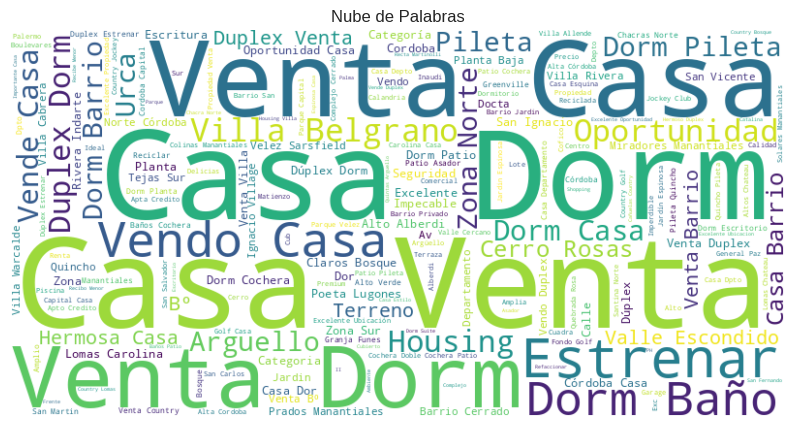

In [ ]:
from wordcloud import WordCloud

palabras = " ".join(df1['terminos_relevantes']).split()

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palabras))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

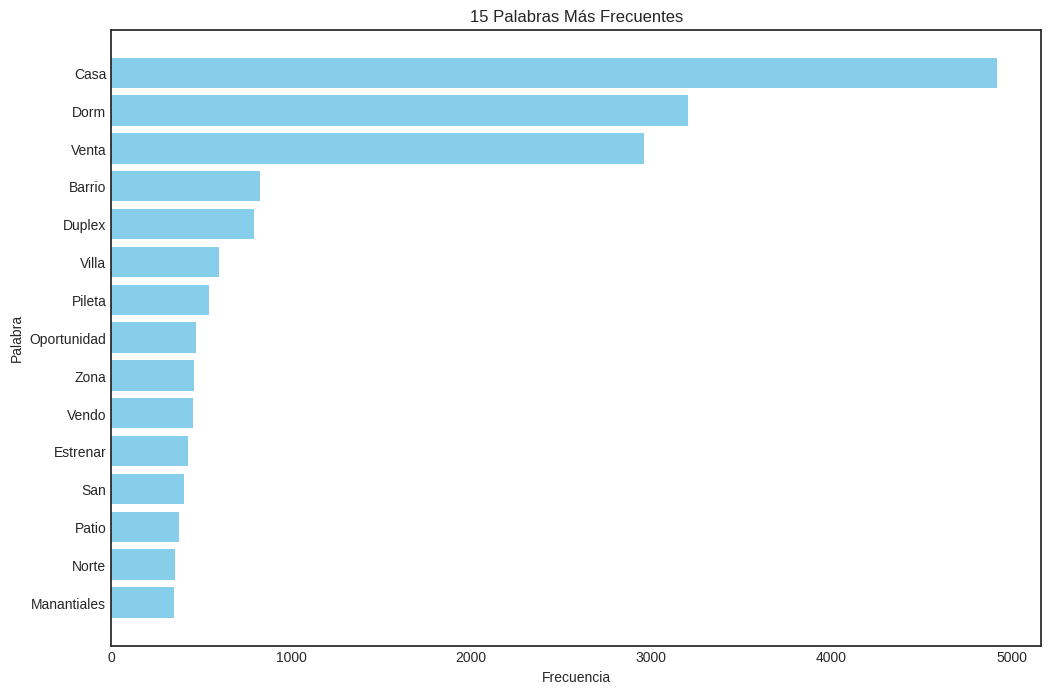

In [ ]:
from collections import Counter

# Definir el valor de X, es decir, cuántas palabras más frecuentes queremos mostrar
X = 15

# Crear una lista de todas las palabras en la columna 'terminos_relevantes'
palabras = " ".join(df1['terminos_relevantes']).split()

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Seleccionar las X palabras más frecuentes
top_X_palabras = frecuencia_palabras.most_common(X)
palabras, frecuencias = zip(*top_X_palabras)

# Crear un gráfico de barras horizontal con las X palabras más frecuentes
plt.figure(figsize=(12, 8))
plt.barh(palabras, frecuencias, color='skyblue')
plt.title(f'{X} Palabras Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra más frecuente esté en la parte superior
plt.show()

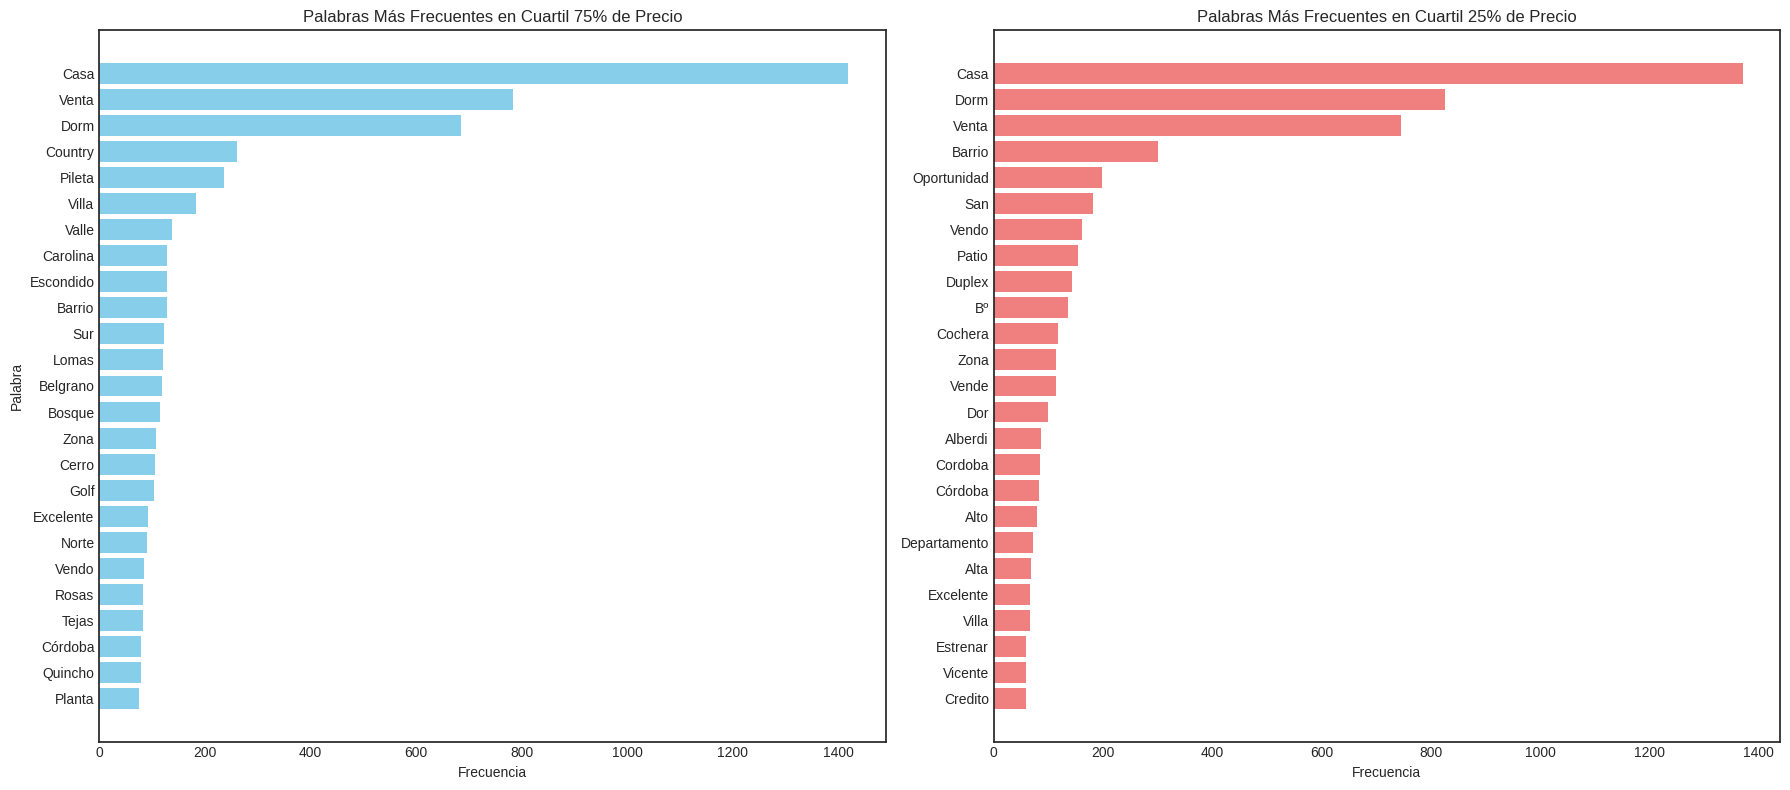

In [ ]:
# Determina los cuartiles 25% y 75% de los precios
cuartil_25 = df1['Precio'].quantile(0.25)
cuartil_75 = df1['Precio'].quantile(0.75)

# Filtra el DataFrame para obtener solo las filas donde el Precio está en el cuartil 25%
df_cuartil_25 = df1[df1['Precio'] <= cuartil_25]
df_cuartil_75 = df1[df1['Precio'] >= cuartil_75]

# Combina todas las palabras relevantes de las filas seleccionadas en un solo texto
texto_cuartil_25 = ' '.join(df_cuartil_25['terminos_relevantes'].tolist())
texto_cuartil_75 = ' '.join(df_cuartil_75['terminos_relevantes'].tolist())

# Divide el texto en palabras
palabras_cuartil_25 = texto_cuartil_25.split()
palabras_cuartil_75 = texto_cuartil_75.split()

# Contar la frecuencia de cada palabra
frecuencia_palabras_cuartil_25 = Counter(palabras_cuartil_25)
frecuencia_palabras_cuartil_75 = Counter(palabras_cuartil_75)

# Definir el valor de X, es decir, cuántas palabras más frecuentes queremos mostrar
X = 25

# Seleccionar las X palabras más frecuentes del cuartil 75%
top_X_palabras_cuartil_75 = frecuencia_palabras_cuartil_75.most_common(X)
palabras_75, frecuencias_75 = zip(*top_X_palabras_cuartil_75)

# Seleccionar las X palabras más frecuentes del cuartil 25%
top_X_palabras_cuartil_25 = frecuencia_palabras_cuartil_25.most_common(X)
palabras_25, frecuencias_25 = zip(*top_X_palabras_cuartil_25)

# Crear un gráfico de barras horizontal con las X palabras más frecuentes
plt.figure(figsize=(18, 8))

# Gráfico del cuartil 75%
plt.subplot(1, 2, 1)
plt.barh(palabras_75, frecuencias_75, color='skyblue')
plt.title(f'Palabras Más Frecuentes en Cuartil 75% de Precio')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra más frecuente esté en la parte superior

# Gráfico del cuartil 25%
plt.subplot(1, 2, 2)
plt.barh(palabras_25, frecuencias_25, color='lightcoral')
plt.title(f'Palabras Más Frecuentes en Cuartil 25% de Precio')
plt.xlabel('Frecuencia')
plt.gca().invert_yaxis()  # Invertir el eje y

plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

Vamos a crear un nuevo data frame para agregar una nueva columna que clasifique los tipos de inmuebles en venta

In [ ]:
df2=df1

# Definir función para asignar el valor de "Type" basado en la columna "title"
def asignar_tipo(row):
    title = row['title']
    if 'Triplex' in title:
        return 'Triplex'
    elif any(x in title for x in ['Conteiners', 'CONTEINERS']):
        return 'Conteiners'
    elif any(x in title for x in ['Venta Terreno', 'Terreno en venta','Terreno Apto Duplex']):
      return 'Terreno'
    elif 'PH' in title and 'Casa' in title:
        return 'Casa PH'
    elif 'Duplex' in title:
        return 'Duplex'
    elif 'Cabaña' in title:
        return 'Cabaña'
    elif 'PH' in title:
        return 'PH'
    elif 'Housing/Casa' in title:
        return 'Housing/Casa'
    elif any(x in title for x in ['°°°duplex', 'Dlupex', 'Duplex', 'Dúplex', 'dúplex', 'Duplex!', 'Duplexs']):
        return 'Duplex'
    elif 'Casa' in title and 'Departamentos' in title and ('más' in title or 'mas' in title):
        return 'Casa + Departamentos'
    elif 'Casa' in title:
        return 'Casa'
    elif any(x in title for x in ['Locales', 'Local', 'Complejo de Oficinas']):
        return 'Locales'
    elif any(x in title for x in['Excelente Propiedad con 7 Unidades', 'Propiedad Apta Edificio','Gran Propiedad - Multiple Rentas','Propiedad en Venta P - Inversion (5 Unidades)']):
        return 'PROYECTOS'
    elif 'Propiedad en Planta Baja de 4 Dorm.' in title:
        return 'Departamento'
    elif 'Departamentos' in title:
        return 'Varios Dptos'
    elif any(x in title for x in ['Departamento','Depto','Dpto','Dto']):
        return 'Departamento'
    elif 'Propiedad' in title:
        return 'Casa'
    else:
        return 'REVISAR'

# Aplicar la función a la columna "title" para crear la columna "Type"
df2['Type'] = df2.apply(asignar_tipo, axis=1)

# Mostrar el DataFrame resultante
df2[['title', 'Type']]

<ipython-input-21-c907fb538415>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Type'] = df2.apply(asignar_tipo, axis=1)


,title,Type
0,Venta Dúplex a Estrenar 2 Dorm. Docta,Duplex
1,Casa a Estrenar Cañuelas Country Golf 5 Dorm. ...,Casa
2,Oportunidad en Venta Portales del Sur 3 Dorm. ...,REVISAR
3,Cañuelas Country Golf Casa en Venta 4 Dorm.,Casa
4,Ideal Inversor - Casa + Departamento - Excelen...,Casa
...,...,...
7959,Venta Casa 8 Habitaciones + Local Alberdi,Casa
7960,Vendo Casa 3 Dorm. a m de Recta Martinolli,Casa
7962,Venta Casa Mas Departamento Barrio Jorge Newbery,Casa
7963,Rebajado! Va. Rivera Indarte 2 Dorm. con Pileta!,REVISAR


El nuevo dataset quedí almacenado en la variable ***df2***

In [ ]:
df2.shape

(7419, 21)

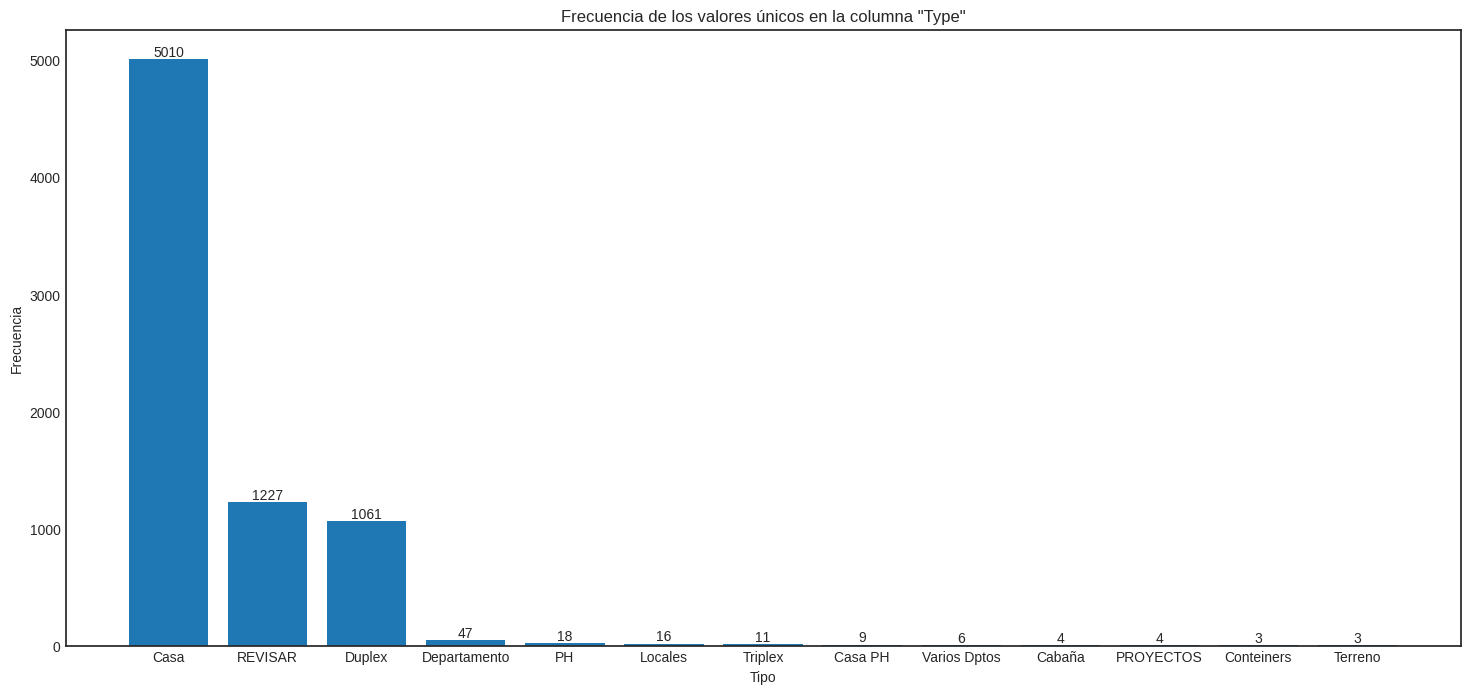

In [ ]:
# Calcular la frecuencia de los valores únicos en la columna "Type"
frecuencia2 = df2['Type'].value_counts()

# Ajustar el tamaño de la figura del gráfico
plt.figure(figsize=(18, 8))

# Crear el gráfico de barras
plt.bar(frecuencia2.index, frecuencia2.values)


# Agregar etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores únicos en la columna "Type"')

# Agregar el total de observaciones por cada valor
for i, v in enumerate(frecuencia2.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
df_revisar = df2.loc[df2['Type'] == 'REVISAR']
df_revisar

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
2,49342508,135000,Oportunidad en Venta Portales del Sur 3 Dorm. ...,Grimaut Lopez Propiedades le ofrece en esta ex...,"Portales Del Sur (calle Huiliches), Parque Atl...",Parque Atlántica,150.0,120.0,3.0,3.0,...,0.0,1,2.0,0,0,NaN,-3.145716e+16,-6.420963e+16,Oportunidad Venta Portales Sur Dorm Quincho,REVISAR
5,48034128,450000,La Cascada Country Golf a Estrenar,PROPIEDAD A ESTRENAR Grimaut Lopez Propiedade...,"La Cascada Lote / N° 0, La Cascada Country Gol...",La Cascada Country Golf,1500.0,350.0,3.0,3.0,...,0.0,1,3.0,0,0,NaN,-3.146459e+16,-6.425995e+16,Cascada Country Golf Estrenar,REVISAR
7,48886046,470000,Fortín del Pozo Country,Grimaut Lopez Propiedades le ofrece propiedad ...,"Fortin Del Pozo Lote / N° 0, Country Fortin de...",Country Fortin del Pozo,2000.0,350.0,3.0,3.0,...,0.0,1,2.0,0,0,NaN,-3.147528e+16,-6.417025e+16,Fortín Pozo Country,REVISAR
9,48034114,450000,La Cascada Country Golf a Estrenar,OPORTUNIDAD EN LA CASCADA\n Grimaut Lopez Prop...,"La Cascada Lote / N° 0, La Cascada Country Gol...",La Cascada Country Golf,1500.0,350.0,3.0,4.0,...,0.0,1,NaN,0,0,NaN,-3.146459e+16,-6.425995e+16,Cascada Country Golf Estrenar,REVISAR
18,48471997,280000,Inversion - Mejor Zona del Cerro! a m. de Av N...,CARACTERISTICAS GRALES.BARRIO ALTO PALERMOA 10...,", Córdoba, Córdoba",Córdoba,800.0,500.0,4.0,4.0,...,0.0,1,NaN,0,0,NaN,-3.142008e+16,-6.418878e+16,Inversion Zona Cerro Av Nuñez,REVISAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,44370334,132000,Venta. Palmas de Claret 3 Dorm. Zona Circunval...,"VENTA DUPLEX DE 3 DORMITORIOS Esquina, en barr...","Lino Spilimbergo y Colectora , Córdoba, Córdoba",Córdoba,NaN,143.0,2.0,3.0,...,15.0,0,2.0,0,0,NaN,-3.143451e+16,-6.417502e+16,Venta Palmas Claret Dorm Zona Circunvalacion S...,REVISAR
7925,48966913,350000,Liquido Casona! Solo Para Entendidos E Inversi...,LOPEZBAENA PROPIEDADES TE OFRECE EN EL CENTRO ...,"Av. General Paz al 600, Centro, Córdoba",Centro,360.0,360.0,14.0,13.0,...,100.0,0,NaN,0,0,NaN,-3.140826e+16,-6.418366e+16,Liquido Casona Entendidos Inversionistas,REVISAR
7932,43070063,650000,Cerro de Las Rosas - Piscina Climatizada - Cat...,Propiedad de categoria ubicada en Cerro de las...,"Gregorio Velez 4200, Cerro de las Rosas, Córdoba",Cerro de las Rosas,1500.0,800.0,6.0,3.0,...,2011.0,0,10.0,0,0,NaN,-3.137389e+16,-6.423697e+16,Cerro Rosas Piscina Climatizada Categoria Amoblad,REVISAR
7963,43361390,115000,Rebajado! Va. Rivera Indarte 2 Dorm. con Pileta!,REBAJADO!! VILLA RIVERA INDARTE Jardin con Pil...,"Macha 3100, Villa Rivera Indarte, Córdoba",Villa Rivera Indarte,260.0,110.0,2.0,2.0,...,2016.0,0,2.0,0,0,NaN,-3.131410e+16,-6.429459e+16,Rebajado Rivera Indarte Dorm Pileta,REVISAR


In [ ]:
# Lista de frases a buscar en la columna 'Description'
frases_a_buscar = ['Venta de terreno', 'Venta Terreno', 'Terreno en venta']

# Filtra las filas que contienen alguna de las frases en 'Description'
filtros = df2['Description'].str.contains('|'.join(frases_a_buscar), case=False, na=False)

# Asigna el valor 'Terreno' a la columna 'Type' en las filas filtradas
df2.loc[filtros, 'Type'] = 'Terreno'

In [ ]:
df2.sample(3)

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
2945,43494876,140000,Duplex en Venta 3 Dorm. Housing Villa Warcalde,VILLA WARCALDE - OPORTUNIDAD!!!!: ÚNICA PROPIE...,"José María Eguia Zanón 9600, Villa Warcalde, C...",Villa Warcalde,360.0,130.0,2.0,3.0,...,NaN,1,2.0,0,0,1.0,-3.133715e+16,-6.429848e+16,Duplex Venta Dorm Housing Villa Warcalde,Duplex
1603,45226130,155000,Alto Verde: Amplia Casa Señoreal con Gran Jard...,ALTO VERDE!!! EXCELENTE PROPIEDAD CASA AMPLIA ...,"La Ramada al al 3500, Alto Verde, Córdoba",Alto Verde,600.0,NaN,2.0,4.0,...,NaN,1,2.0,0,0,NaN,-3.136870e+16,-6.422017e+16,Alto Verde Amplia Casa Señoreal Jardin Patio,Casa
7877,44133849,185000,Villa Belgrano Casa en Venta 1 Planta,Propiedad ubicada a metros de Recta Martinoli....,"Viracocha 6071, Villa Belgrano, Córdoba",Villa Belgrano,530.0,250.0,2.0,3.0,...,25.0,0,1.0,0,0,NaN,-3.134750e+16,-6.427794e+16,Villa Belgrano Casa Venta Planta,Casa


In [ ]:
# Definir una función para aplicar las columnas con el valor "REVISAR" en Type
def update_type(row):
    description = row['Description']
    original_type = row['Type']

    if original_type == 'REVISAR':
        if isinstance(description, str):  # Verificar si es una cadena de texto
            if 'desarrollo de loteos' in description.lower():
                return 'Terreno'
            if 'casa' in description.lower():
                return 'Casa'
            elif any(keyword in description.lower() for keyword in ['dúplex', 'duplex', 'vende:dúplex', 'duplex']):
                return 'Duplex'

    return original_type

# Aplicar la función a las filas del DataFrame df3
df2['Type'] = df2.apply(update_type, axis=1)

<ipython-input-27-1ab79debaf14>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Type'] = df2.apply(update_type, axis=1)


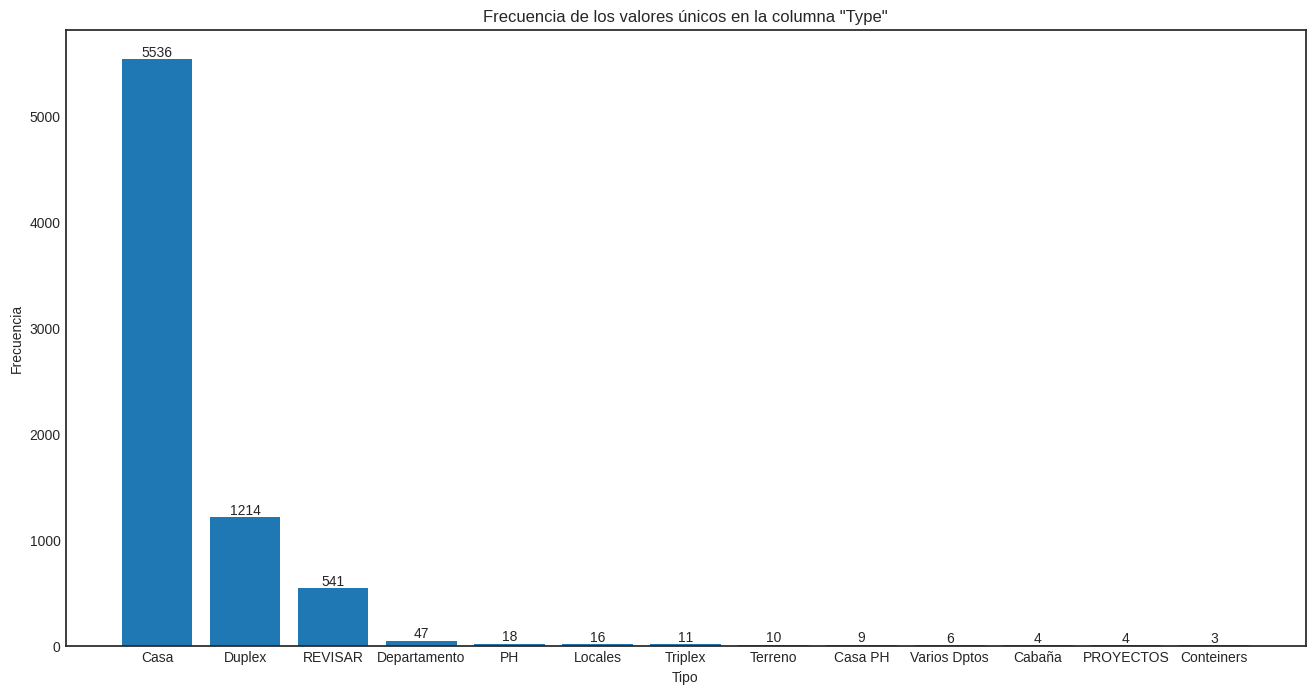

In [ ]:
# Calcular la frecuencia de los valores únicos en la columna "Type"
frecuencia2 = df2['Type'].value_counts()

# Ajustar el tamaño de la figura del gráfico
plt.figure(figsize=(16, 8))

# Crear el gráfico de barras
plt.bar(frecuencia2.index, frecuencia2.values)


# Agregar etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores únicos en la columna "Type"')

# Agregar el total de observaciones por cada valor
for i, v in enumerate(frecuencia2.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
df3=df2

def actualizar_type(row):
    if row['Type'] == 'REVISAR':
        title = row['title'].lower()
        keywords = ['dorm', 'dor', 'dorm.', 'dormitorio']
        if any(keyword in title for keyword in keywords):
            return 'Casa'
    return row['Type']

# Aplicar la función a cada fila del DataFrame
df3['Type'] = df3.apply(actualizar_type, axis=1)

<ipython-input-29-a2eaac91100c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Type'] = df3.apply(actualizar_type, axis=1)


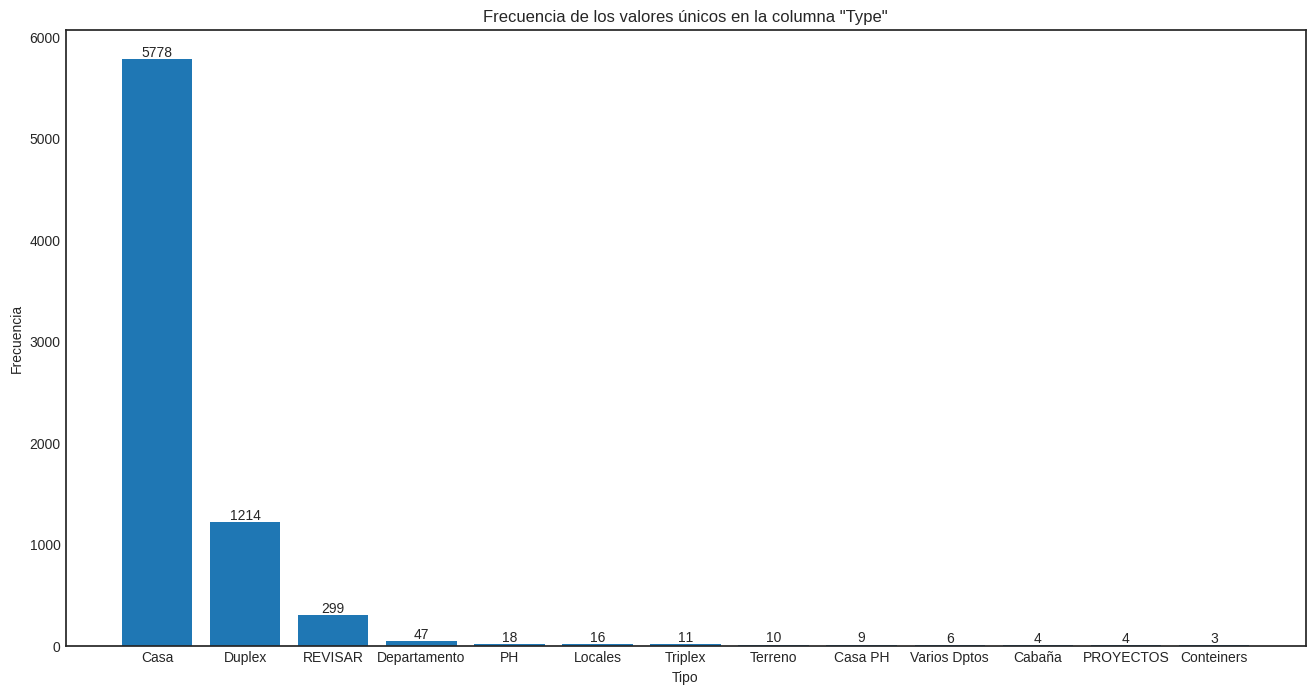

In [ ]:
# Calcular la frecuencia de los valores únicos en la columna "Type"
frecuencia2 = df3['Type'].value_counts()

# Ajustar el tamaño de la figura del gráfico
plt.figure(figsize=(16, 8))

# Crear el gráfico de barras
plt.bar(frecuencia2.index, frecuencia2.values)


# Agregar etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores únicos en la columna "Type"')

# Agregar el total de observaciones por cada valor
for i, v in enumerate(frecuencia2.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
def actualizar_type(row):
    if row['Type'] == 'REVISAR':
        description = row['Description'].lower()
        palabras_clave = ['propiedad']
        palabras_excluidas = ['DEPTO.', 'construcción de edificio', 'DEPTOS', 'COMPLEJO DE OFICINAS', 'Departamento', 'departamentos', 'Housing', 'HOUSING']

        if any(palabra in description for palabra in palabras_clave) and not any(palabra in description for palabra in palabras_excluidas):
            return 'Casa'
    return row['Type']

# Aplicar la función a cada fila del DataFrame
df3['Type'] = df3.apply(actualizar_type, axis=1)

<ipython-input-31-083d8968528a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Type'] = df3.apply(actualizar_type, axis=1)


In [ ]:
# Define una función personalizada para actualizar la columna 'Type'
def actualizar_type(row):
    palabras_clave = ['Dlupex', 'Duplex', 'Dúplex', 'dúplex', 'Duplex!', 'Duplexs']

    # Verificar si la Description no es NaN y si el valor en la columna "Type" es "Casa"
    if not pd.isna(row['Description']) and row['Type'] == 'Casa':
        if any(palabra in row['Description'] for palabra in palabras_clave):
            return 'Duplex'

    return row['Type']

# Aplicar la función a cada fila del DataFrame
df3['Type'] = df3.apply(actualizar_type, axis=1)

<ipython-input-32-296c3923aaa0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Type'] = df3.apply(actualizar_type, axis=1)


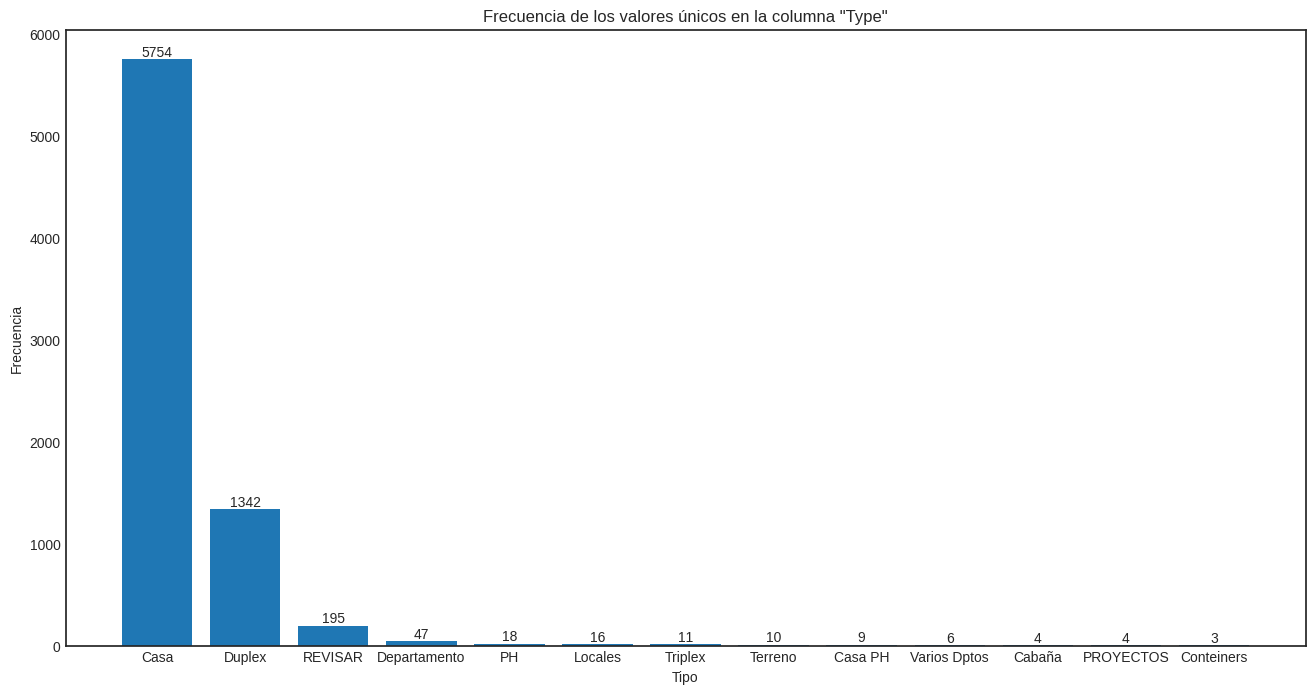

In [ ]:
# Calcular la frecuencia de los valores únicos en la columna "Type"
frecuencia2 = df3['Type'].value_counts()

# Ajustar el tamaño de la figura del gráfico
plt.figure(figsize=(16, 8))

# Crear el gráfico de barras
plt.bar(frecuencia2.index, frecuencia2.values)


# Agregar etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores únicos en la columna "Type"')

# Agregar el total de observaciones por cada valor
for i, v in enumerate(frecuencia2.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular la frecuencia de los valores en la columna 'Type'
frecuencia = df3['Type'].value_counts()

# Calcular el total de observaciones
total_observaciones = len(df3)

# Calcular el porcentaje de frecuencia para cada valor
porcentaje_frecuencia = (frecuencia / total_observaciones) * 100

# Mostrar el porcentaje de frecuencia
print(porcentaje_frecuencia)

Casa            77.557622
Duplex          18.088691
REVISAR          2.628387
Departamento     0.633509
PH               0.242620
Locales          0.215662
Triplex          0.148268
Terreno          0.134789
Casa PH          0.121310
Varios Dptos     0.080873
Cabaña           0.053916
PROYECTOS        0.053916
Conteiners       0.040437
Name: Type, dtype: float64


In [ ]:
condicion = df3['Type'].isin(['Casa', 'Duplex'])
df1 = df3[condicion]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7096 entries, 0 to 7965
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idPost               7096 non-null   int64  
 1   Precio               7096 non-null   int64  
 2   title                7096 non-null   object 
 3   Description          7088 non-null   object 
 4   direccion            7061 non-null   object 
 5   barrio               7061 non-null   object 
 6   m2total              6983 non-null   float64
 7   m2cubierto           6860 non-null   float64
 8   Banos                6886 non-null   float64
 9   Dormitorios          6904 non-null   float64
 10  Ambientes            6144 non-null   float64
 11  Antiguedad           4790 non-null   float64
 12  Estrenar             7096 non-null   int64  
 13  Cochera              5152 non-null   float64
 14  Estado               7096 non-null   int64  
 15  Luminoso             7096 non-null   i

Nuevamente Identificamos los valores perdidos en %

In [ ]:
df1_perdidos = df1.isnull().sum()/len(df1)*100
df1_perdidos.sort_values(ascending=False)

Toilette               78.058061
Antiguedad             32.497182
Cochera                27.395716
Ambientes              13.416009
m2cubierto              3.325817
Banos                   2.959414
Dormitorios             2.705750
m2total                 1.592446
coordenadas.lng         0.831454
coordenadas.lat         0.831454
direccion               0.493236
barrio                  0.493236
Description             0.112740
Luminoso                0.000000
terminos_relevantes     0.000000
idPost                  0.000000
Estado                  0.000000
Estrenar                0.000000
Precio                  0.000000
title                   0.000000
Type                    0.000000
dtype: float64

#### ***1.6 📉 Análisis de Variables Cuantitativas: Precio***

In [ ]:
df1.head()

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
0,48533035,75000,Venta Dúplex a Estrenar 2 Dorm. Docta,Dúplex en un planta a Estrenar en Urbanización...,"Calle Lote / N° 5, DOCTA, Córdoba",DOCTA,125.0,73.0,1.0,2.0,...,0.0,1,1.0,0,0,NaN,-3.142008e+16,-6.418877e+16,Venta Dúplex Estrenar Dorm Docta,Duplex
1,48850244,620000,Casa a Estrenar Cañuelas Country Golf 5 Dorm. ...,"Grimaut Lopez Propiedades, le ofrece en esta e...","Country Cañuelas Lote / N° 0, Cañuelas Country...",Cañuelas Country Golf,1500.0,500.0,4.0,5.0,...,0.0,1,1.0,0,0,NaN,-3.147486e+16,-6.416392e+16,Casa Estrenar Cañuelas Country Golf Dorm Pileta,Casa
2,49342508,135000,Oportunidad en Venta Portales del Sur 3 Dorm. ...,Grimaut Lopez Propiedades le ofrece en esta ex...,"Portales Del Sur (calle Huiliches), Parque Atl...",Parque Atlántica,150.0,120.0,3.0,3.0,...,0.0,1,2.0,0,0,NaN,-3.145716e+16,-6.420963e+16,Oportunidad Venta Portales Sur Dorm Quincho,Casa
3,48928465,520000,Cañuelas Country Golf Casa en Venta 4 Dorm.,GRIMAUT LOPEZ PROPIEDADES TE OFRECE CASA EN CO...,"CaÑuelas Lote / N° 0, Cañuelas Country Golf, C...",Cañuelas Country Golf,1500.0,320.0,4.0,4.0,...,0.0,1,1.0,0,0,NaN,-3.147486e+16,-6.416392e+16,Cañuelas Country Golf Casa Venta Dorm,Casa
4,48926408,75000,Ideal Inversor - Casa + Departamento - Excelen...,Ideal Inversor. Se ofrecen dos propiedades - a...,"9 De Julio 3300, Alto Alberdi, Córdoba",Alto Alberdi,166.0,81.0,2.0,2.0,...,0.0,1,NaN,0,0,NaN,-3.140223e+16,-6.422527e+16,Ideal Inversor Casa Departamento Excelente Renta,Casa


In [ ]:
#Variable Precio
df1['Precio'] = df1['Precio'] / 1000 # Para simplificar la visualización de los importes vamos a mostras los precios como miles de USD
df1['Precio'].describe()

<ipython-input-39-49c65f298cbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Precio'] = df1['Precio'] / 1000 # Para simplificar la visualización de los importes vamos a mostras los precios como miles de USD


count    7096.000000
mean      196.973786
std       180.158261
min         0.001000
25%        90.000000
50%       142.000000
75%       235.000000
max      2500.000000
Name: Precio, dtype: float64

Se detectó que el valor mínimo del precio es 1 USD, lo cual no puede ser, por lo que se realizará un estudio más detallado sobre estos valores bajos.

In [ ]:
df1_filtrado = df1[df1['Precio'] < 1.5] #Comenzaremos analizando aquellas publicaciones en el que el precio de venta sea menor a 1,500 USD
df1_filtrado

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
853,48624421,0.170,Vendo Exc Duplex en Introva Eco Housing,Vendo excelentes duplex de 3 dormitorios a est...,"Cap Ardiles , Tejas II, Córdoba",Tejas II,180.0,140.0,2.0,3.0,...,NaN,1,2.0,0,1,1.0,-3.147873e+16,-6.420160e+16,Vendo Exc Duplex Introva Eco Housing,Duplex
1053,48227734,0.001,Casa en Housing a Estrenar en Villa Belgrano,CB Servicios Inmobiliarios vende casa de categ...,"Blas Pascal 6122, Villa Belgrano, Córdoba",Villa Belgrano,180.0,180.0,2.0,3.0,...,NaN,1,2.0,0,0,1.0,-3.135380e+16,-6.425434e+16,Casa Housing Estrenar Villa Belgrano,Casa
1273,45918203,0.001,Housing en Venta Bº Los Carolinos,HOUSING DE 8 UNIDADES SITUADO EN EL BARRIO LA ...,"punta del este, La Carolina, Córdoba",La Carolina,460.0,210.0,3.0,3.0,...,NaN,1,NaN,1,1,NaN,-3.135287e+16,-6.428462e+16,Housing Venta Bº Carolinos,Casa
1279,49526803,0.001,Oportunidad Duplex en Venta Categoria Chacras ...,"Hermosos Duplex en venta de categoria, diseño ...","chacras del norte, Chacra del Norte, Córdoba",Chacra del Norte,180.0,180.0,2.0,3.0,...,NaN,1,2.0,0,1,1.0,-3.135032e+16,-6.421551e+16,Oportunidad Duplex Venta Categoria Chacras Norte,Duplex
1583,48613459,0.100,- Destacado - Posesion Inmediata - 225 m² - Ga...,"INMOBILIARIA LIRPAND, te ofrece: Patagonia Vil...","Patagonia Village, Valle Escondido , Córdoba",Valle Escondido,225.0,139.0,2.0,3.0,...,NaN,1,2.0,0,1,1.0,-3.136306e+16,-6.428279e+16,Destacado Posesion Inmediata Galeria Asador Co...,Duplex
2064,49428404,1.111,Vendo Casa Excepcional Camino a Carlos Paz,- 5 dormitorios - 6 baños - Full equipada -...,". 0, Córdoba, Córdoba",Córdoba,NaN,NaN,NaN,5.0,...,NaN,1,NaN,0,0,NaN,-3.143723e+16,-6.416520e+16,Vendo Casa Excepcional Camino Carlos Paz,Casa
2490,46466682,0.010,La Carolina Cordoba Casa en Venta 4 Dorm. Hous...,LOS CAROLINOS – HOUSING H3: ubicado sobre la R...,"La Carolina 5710, La Carolina, Córdoba",La Carolina,370.0,250.0,3.0,4.0,...,NaN,1,2.0,0,0,NaN,-3.135277e+16,-6.428434e+16,Carolina Cordoba Casa Venta Dorm Housing,Casa
2815,45162381,1.111,Casa en Housing en La Carolina Córdoba,Casa muy linda en venta en el Housing La Carol...,"Luis Guemes 900, La Carolina, Córdoba",La Carolina,500.0,210.0,3.0,3.0,...,NaN,1,NaN,0,0,NaN,-3.135144e+16,-6.428420e+16,Casa Housing Carolina Córdoba,Casa
2877,46466756,0.010,La Carolina Casa en Venta 3 Dorm. 1 Planta Hou...,LOS CAROLINOS – HOUSING H3: ubicado sobre la R...,"La Carolina 5710, La Carolina, Córdoba",La Carolina,360.0,240.0,2.0,3.0,...,NaN,1,2.0,0,0,NaN,-3.135277e+16,-6.428434e+16,Carolina Casa Venta Dorm Planta Housing,Casa
2946,43717541,0.080,Argüello (Tupac Yupanqui Esq. Huascar) - Venta...,ARGÜELLO VENTA CASA 2 DORMITORIOS TUPAC YUPA...,"TUPAC YUPANQUI ESQ HUASCAR 0, Argüello, Córdoba",Argüello,250.0,90.0,2.0,2.0,...,NaN,1,NaN,0,0,NaN,-3.133456e+16,-6.427663e+16,Argüello Tupac Yupanqui Esq Huascar Venta Casa...,Casa


Luego de analizar las publicaciones que tienen un precio de venta menor a 1,500 USD se confirma el "error" por parte del vendedor al publicar la propiedad
 y como no se cuenta con información sobre el precio en la descripción de la publicación, se decide omitir estas publicaciones.

In [ ]:
df2= df1[df1['Precio'] >= 1.5]

In [ ]:
df2_filtrado = df2[df1['Precio'] < 20] # Ahora analizaremos aquellas publicaciones en el que el precio de venta sea menor a 20,000 USD
df2_filtrado

<ipython-input-42-da2ba37eeffa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_filtrado = df2[df1['Precio'] < 20] # Ahora analizaremos aquellas publicaciones en el que el precio de venta sea menor a 20,000 USD


,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
26,49655031,17.500,Casa a Reciclar Corro y Pardo de Figueroa,Cerca de Bº Nueva Córdoba.\n - Cocina-comedor....,"Pardo de Figueroa 829, Córdoba, Córdoba, Argen...",Córdoba,173.0,122.0,1.0,2.0,...,0.0,1,NaN,0,0,NaN,-3.142668e+16,-6.419963e+16,Casa Reciclar Corro Pardo Figueroa,Casa
86,49818983,14.000,Vendo! Casa de Dos Dorm. - B ° Yapeyu,Grupo Banker te ofrece en venta casa de dos do...,"Juan Roque 200, Yapeyú, Córdoba",Yapeyú,200.0,110.0,1.0,2.0,...,0.0,1,NaN,0,0,NaN,-3.141473e+16,-6.415080e+16,Vendo Casa Dorm Yapeyu,Casa
91,49564549,15.000,Venta! Bella Vista - Casa Dos Dorm - a Reciclar,Grupo Banker vende a reciclar casa de dos dorm...,"Martin Ferreyra 1000, Bella Vista, Córdoba",Bella Vista,124.0,124.0,1.0,2.0,...,0.0,1,1.0,0,0,NaN,-3.143579e+16,-6.420881e+16,Venta Bella Vista Casa Dorm Reciclar,Casa
201,49838865,17.000,Real Oportunidad Casa 2 Dormitorio en Venta Ba...,OPORTUNIDAD CASA BARRIO ALTAMIRA\n GRUPO BANKE...,"Estados Unidos 4400, Altamira, Córdoba",Altamira,110.0,98.0,1.0,2.0,...,0.0,1,NaN,0,0,NaN,-3.142363e+16,-6.412898e+16,Real Oportunidad Casa Dormitorio Venta Barrio ...,Casa
1843,44590193,15.000,Ampliacion Altamira Casa Para Demoler Ó Refacc...,AMPLIACION ALTAMIRA CASA A DEMOLER 290 m2 terr...,"Domingo Mateau al 4000, Córdoba, Córdoba",Córdoba,NaN,NaN,NaN,NaN,...,NaN,1,NaN,0,0,NaN,-3.144419e+16,-6.418458e+16,Ampliacion Altamira Casa Demoler Refaccionar,Casa
2944,43494864,11.111,Casa en Venta 3 Dorm. Córdoba Housing Los Caro...,HOUSING: En uno de los barrios más bellos de l...,"Luis Güemes 8510, La Carolina, Córdoba",La Carolina,360.0,190.0,2.0,3.0,...,NaN,1,2.0,1,0,1.0,-3.135150e+16,-6.428380e+16,Casa Venta Dorm Córdoba Housing Carolinos,Casa
3514,48881767,19.900,Casa 1 Dormitorio en El Pueblito Salsipuedes,Corredor Responsable: Franco Saravia CPCPI 661...,"Bialet Masse Esquina Calle 37 S/N, Colón, Córdoba",Colón,310.0,36.0,1.0,1.0,...,4.0,0,1.0,0,0,NaN,-3.111963e+16,-6.429381e+16,Casa Dormitorio Pueblito Salsipuedes,Casa
4322,49590795,17.900,Duplex en Venta 1 Dorm. C/renta,"Se vende Dúplex en Barrio Cólon, sobre calle A...","Asturias 1800, Colón, Córdoba",Colón,44.0,44.0,1.0,1.0,...,50.0,0,NaN,0,0,NaN,-3.143969e+16,-6.415931e+16,Duplex Venta Dorm renta,Duplex
4960,49830308,18.000,Oportunidad Unica!,Gestión Inmobiliaria ofrece en venta Casa en B...,"paula dominguez bazan 4000, Los Robles, Córdoba",Los Robles,184.0,50.0,1.0,2.0,...,30.0,0,1.0,0,0,NaN,-3.139915e+16,-6.426504e+16,Oportunidad Unica,Casa
6348,47262588,9.999,Se Vende Casa en B° Amp. 1ro de Mayo - Retasad...,SE VENDE CASA EN B° AMP. 1ro DE MAYO - RETASAD...,"José Pacheco De Melo 5500, 1º de Mayo, Córdoba",1º de Mayo,312.0,81.0,1.0,2.0,...,23.0,0,NaN,0,0,NaN,-3.144519e+16,-6.411304e+16,Vende Casa Amp Mayo Retasado Oportunidad,Casa


No se cuenta con informacióin suficiente para descartar estas publicaciones (*aunque los precios, en principio, no parezcan normales*), por lo que se da por concluida la limpieza de la columna **"Precio"**.

In [ ]:
print("Valores perdidos de la variable Precio:", df2['Precio'].isnull().sum())

Valores perdidos de la variable Precio: 0


Observación de valores ***Outliers***:

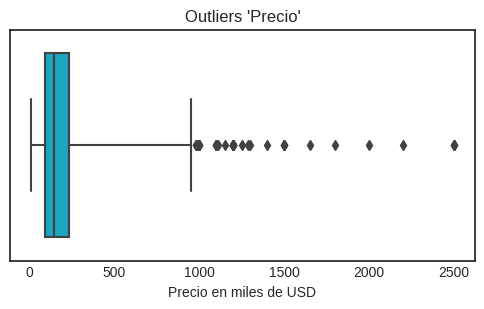

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df2['Precio'], whis=5, color="#00B8D9", ax=ax)
ax.set_title("Outliers 'Precio'")
ax.set_xlabel("Precio en miles de USD")


plt.show()
#Observamos una gran cantidad de outliers en la variable precio

Para finalizar el análisis de los outliers veremos cuánto representan respecto al total de publicaciones.

In [ ]:
cantidad_publicaciones = (df2['Precio'] > 500).sum()

# Imprime la cantidad de publicaciones
print("Cantidad de publicaciones con precio mayor a 500.000 USD :", cantidad_publicaciones)
print("Un {:.2%}".format(cantidad_publicaciones / len(df2)),"del total de las publicaciones presenta un precio de venta superior a 500k USD")

Cantidad de publicaciones con precio mayor a 500.000 USD : 448
Un 6.34% del total de las publicaciones presenta un precio de venta superior a 500k USD


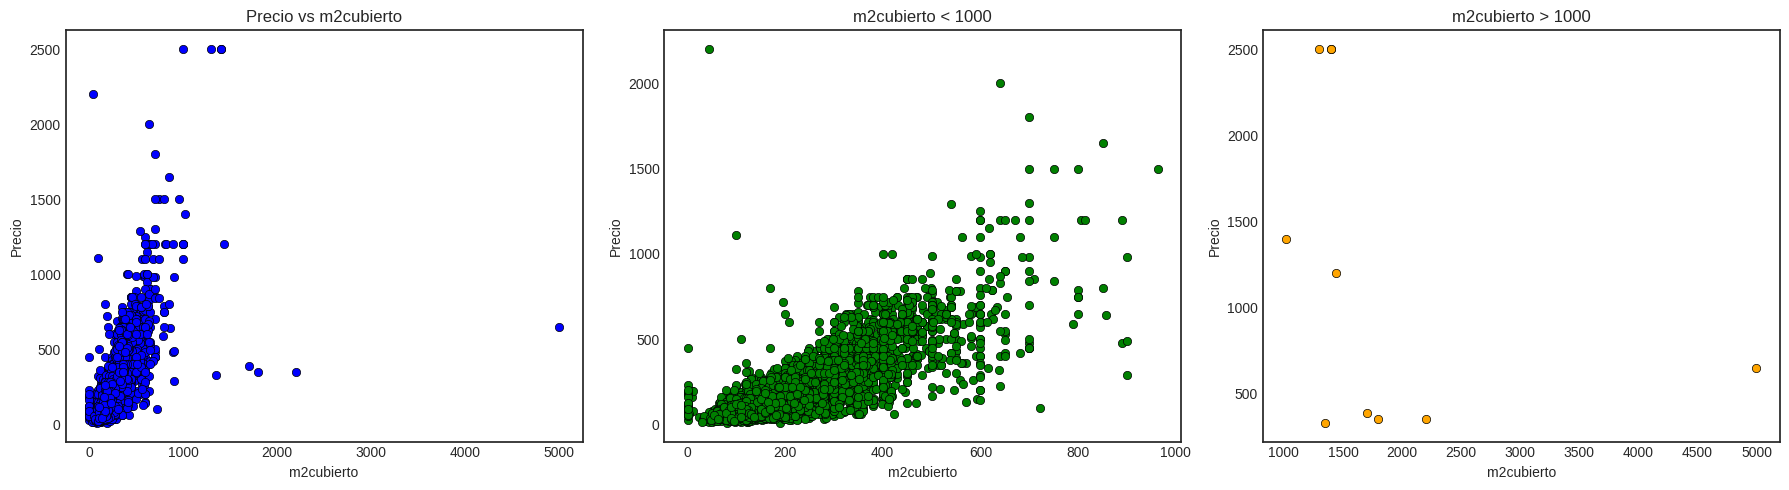

In [ ]:
# Filtro m2cubierto > 1000
df_filtro = df2[df2['m2cubierto'] > 1000]
df_filtro1 = df2[df2['m2cubierto'] < 1000]

# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1
axes[0].scatter(x=df2['m2cubierto'], y=df2['Precio'],
                color="blue", edgecolors="#000000", linewidths=0.5)
axes[0].set_xlabel("m2cubierto")
axes[0].set_ylabel("Precio")
axes[0].set_title("Precio vs m2cubierto")

# Gráfico 2 (con el mismo filtro)
axes[1].scatter(x=df_filtro1['m2cubierto'], y=df_filtro1['Precio'],
                color="green", edgecolors="#000000", linewidths=0.5)
axes[1].set_xlabel("m2cubierto")
axes[1].set_ylabel("Precio")
axes[1].set_title("m2cubierto < 1000")

# Gráfico 3 (sin filtros)
axes[2].scatter(x=df_filtro['m2cubierto'], y=df_filtro['Precio'],
                color="orange", edgecolors="#000000", linewidths=0.5)
axes[2].set_xlabel("m2cubierto")
axes[2].set_ylabel("Precio")
axes[2].set_title("m2cubierto > 1000")


plt.tight_layout()
plt.show()

En principio observando los gráficos anteriores, se interpreta que sería una buena decisión trabajar con aquellas publicaciones en las que los ***m2cubiertos*** sean menores a 1.000, ya que se está en presencia de valores atípicos para una casa en venta.

De todas maneras, antes de realizar este filtro, se analizará el resto de variables y retomaremos esto al último

##### ***1.6.1 📉 Análisis de Variables Cuantitativas: m2total VS m2cubiertos***

In [ ]:
#Variable M2 Totales

df2['m2total'] = df2['m2total'].astype('Int64')
df2['m2total'].describe()

<ipython-input-47-d04c3b5c9691>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['m2total'] = df2['m2total'].astype('Int64')


count          6953.0
mean       1790.98231
std      107933.62328
min               1.0
25%             180.0
50%             281.0
75%             470.0
max         9000000.0
Name: m2total, dtype: Float64

Se detecta que el valor mínimo de la variable *m2total* es 1, lo cual no puede ser, por lo que se realizará un estudio más detallado sobre dichos valores bajos.

In [ ]:
df2_filtrado = df2[df2['m2total'] < 50]
df2_filtrado

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
19,48585145,179.0,Parque Plaza Los Tilos - Prados o Solares - 23...,[RETASADO] FISER Servicios Inmobiliarios tiene...,"cruz roja y rio negro, Manantiales, Córdoba",Manantiales,1,230.0,3.0,3.0,...,0.0,1,2.0,0,0,NaN,-3.147654e+16,-6.422324e+16,Parque Plaza Tilos Prados Solares Dor Bños Gge...,Casa
79,49740362,23.9,Vargez Vende Casa en Cosquín Calle de Las Arma...,VARGEZ Vende casa en construcción con amplio t...,"Cosquín, A.A.T.R.A., Córdoba",A.A.T.R.A.,44,44.0,2.0,NaN,...,0.0,1,1.0,0,0,NaN,-3.121434e+16,-6.447367e+16,Vargez Vende Casa Cosquín Calle Armaduras,Casa
137,48975279,109.0,Manantiales II - Duplex - Categoria y Detalle ...,FISER Servicios Inmobiliarios te presenta en v...,"rio negro esq cruz roja - parada 10, Manantial...",Manantiales,1,130.0,NaN,3.0,...,0.0,1,NaN,0,0,NaN,-3.146593e+16,-6.422058e+16,Manantiales II Duplex Categoria Detalle Dor Bñ...,Duplex
439,47371616,30.0,Casa 1 Dormitorio. | Agustín Tosco Al 500,XINTEL(CPS-CPS-642) Venta de Casa 1 DORMITORIO...,"Agustín Tosco 500, Las Flores, Córdoba",Las Flores,40,40.0,1.0,1.0,...,0.0,1,NaN,0,0,NaN,-3.146485e+16,-6.420856e+16,Casa Dormitorio Agustín Tosco,Casa
510,49641299,180.0,Vendo Casa Comuna 4,COMUNA 4 4 casas disponibles en construcción T...,"Jardin Claret, Jardín Claret, Córdoba",Jardín Claret,2,1.0,2.0,3.0,...,NaN,1,2.0,0,1,1.0,-3.135161e+16,-6.423679e+16,Vendo Casa Comuna,Casa
1266,43905158,195.0,Cba - Duplex en Greenville 2 - Escucho Oferta,camino a San Carlos .De fácil acceso gracias a...,"O´HIGGINS, Greenville, Córdoba",Greenville,10,10.0,NaN,3.0,...,NaN,1,NaN,0,0,NaN,-3.145842e+16,-6.416679e+16,Cba Duplex Greenville Escucho Oferta,Duplex
1393,48398670,80.0,Se Vende Duplex a Estrenar en Bº Alto Alberdi,MORENO & ASOCIADOS VENDE DUPLEX A ESTRENAR EN ...,"GREGORIO LUNA Y CARDENAS , Alto Alberdi, Córdoba",Alto Alberdi,1,1.0,2.0,2.0,...,NaN,1,1.0,0,0,NaN,-3.141410e+16,-6.421177e+16,Vende Duplex Estrenar Bº Alto Alberdi,Duplex
1845,47269457,115.0,Duplex en Venta Housing 2 Dor,"EXCELENTE UBICACION, CERCA COLEGIOS, URCA, CER...","IGUALDAD , Quebrada de las Rosas, Córdoba",Quebrada de las Rosas,1,1.0,2.0,2.0,...,NaN,1,1.0,0,0,NaN,-3.139509e+16,-6.425511e+16,Duplex Venta Housing Dor,Duplex
1867,47535079,175.0,Vendo Dúplex de Categoría a Estrenar Pegado a ...,"Vendo Dúplex a estrenar de categoría, 3 dormit...","Fabricio Carrascull 500, Cañitas, Córdoba",Cañitas,30,157.0,3.0,3.0,...,NaN,1,NaN,0,0,NaN,-3.146484e+16,-6.419425e+16,Vendo Dúplex Categoría Estrenar Pegado Cañitas...,Duplex
2372,49193262,85.0,Venta de Duplex en Villa Claret,SE VENDE DUPLEX EN BARRIO VILLA CLARETHermoso ...,"A , Padre Claret, Córdoba",Padre Claret,1,1.0,2.0,2.0,...,NaN,1,1.0,0,0,NaN,-3.142008e+16,-6.418878e+16,Venta Duplex Villa Claret,Duplex


Analizando más en detalle aquellas publicaciones en las que los ***m2totales*** y ***m2cubiertos*** tienen valores "atípicos" (menores a 50m2), se ha decidido:



1.   En algunos casos reemplazar los valores no informados por el vendedor por el promedio de **m2totales** y **m2cubiertos** respectivamente de acuerdo al tipo de inmueble que se esta vendiendo. Esto se realiza cuando no contamos con la información de los m2 en la descripción de la publicación.

2.   Si en la publicación observamos que el vendedor cita la cantidad de **m2totales** y **m2cubiertos**, reemplazamos los valores con lo respectivamente informado.

In [ ]:
# Lista de idPost
idPost_list = [49641299, 49618010, 46519189, 47729233, 47351503, 49226742, 49778625,
               46595041, 49806175, 48137379, 49226801, 48865215, 46929221, 47732821,44978519,49226825,49226825,
               48817912, 49411141, 46347136, 46672656]

# Filtrar las filas que cumplen con las condiciones
condicion = (df2['idPost'].isin(idPost_list)) & (df2['Type'] == 'Casa')
filas_seleccionadas = df2[condicion]

# Calcular el valor promedio de 'm2total' cuando 'Type' es 'Casa'
valor_promediocasa = df2[df2['Type'] == 'Casa']['m2total'].mean().round()
valor_promedio2casa = df2[df2['Type'] == 'Casa']['m2cubierto'].mean().round()


# Actualizar los valores en la columna 'm2total'
df2.loc[filas_seleccionadas.index, 'm2total'] = valor_promediocasa
df2.loc[filas_seleccionadas.index, 'm2cubierto'] = valor_promedio2casa

In [ ]:
idPost_list = [43905158, 47269457, 49193262, 47996178, 46929255]

# Filtrar las filas que cumplen con las condiciones
condicion = (df2['idPost'].isin(idPost_list)) & (df2['Type'] == 'Duplex')
filas_seleccionadas = df2[condicion]

# Calcular el valor promedio de 'm2total' cuando 'Type' es 'Casa'
valor_promedioduplex = df2[df2['Type'] == 'Duplex']['m2total'].mean().round()
valor_promedio2duplex = df2[df2['Type'] == 'Duplex']['m2cubierto'].mean().round()

# Actualizar los valores en la columna 'm2total'
df2.loc[filas_seleccionadas.index, 'm2total'] = valor_promedioduplex
df2.loc[filas_seleccionadas.index, 'm2cubierto'] = valor_promedio2duplex

In [ ]:
idPost_list = [47569341, 46934025, 46646231]

# Filtrar las filas que cumplen con las condiciones
condicion = (df2['idPost'].isin(idPost_list)) & (df2['Type'] == 'Casa')
filas_seleccionadas = df2[condicion]

# Actualizar los valores en la columna 'm2total'
df2.loc[filas_seleccionadas.index, 'm2cubierto'] = valor_promedio2duplex

In [ ]:
# Actualizar los valores en las columnas 'm2totales' y 'm2cubiertos' según los criterios
df2.loc[df2['idPost'] == 49740362, 'm2total'] = 2182
df2.loc[df2['idPost'] == 49740362, 'm2cubierto'] = 44

df2.loc[df2['idPost'] == 47371616, 'm2total'] = 220

df2.loc[df2['idPost'] == 48398670, 'm2cubierto'] = 72

df2.loc[df2['idPost'] == 49165135, 'm2total'] = 134
df2.loc[df2['idPost'] == 49165135, 'm2cubierto'] = 121

df2.loc[df2['idPost'] == 49462322, 'm2total'] = 262

df2.loc[df2['idPost'] == 49552556, 'm2total'] = 200

df2.loc[df2['idPost'] == 49684392, 'm2total'] = 450
df2.loc[df2['idPost'] == 49684392, 'm2cubierto'] = 90

df2.loc[df2['idPost'] == 47076771, 'm2total'] = 250
df2.loc[df2['idPost'] == 47076771, 'm2cubierto'] = 90

df2.loc[df2['idPost'] == 47692656, 'm2total'] = 180
df2.loc[df2['idPost'] == 47692656, 'm2cubierto'] = 90

df2.loc[df2['idPost'] == 48585145, 'm2total'] = 230
df2.loc[df2['idPost'] == 48975279, 'm2total'] = 130

df2.loc[df2['idPost'] == 48398670, 'm2total'] = valor_promedioduplex
df2.loc[df2['idPost'] == 47535079, 'm2total'] = valor_promedioduplex

df2.loc[df2['idPost'] == 48275530, 'm2total'] = valor_promediocasa
df2.loc[df2['idPost'] == 48741841, 'm2total'] = 400

In [ ]:
df2['m2total'].describe()

#df2_filtrado = df2[df2['m2cubierto'] < 5]
#df2_filtrado

count           6957.0
mean       1797.208423
std      107902.542755
min               38.0
25%              182.0
50%              285.0
75%              480.0
max          9000000.0
Name: m2total, dtype: Float64

In [ ]:
ver=df2[df2['m2total'].isnull()]
ver

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
100,48711263,50.0,Oportunidad - Casa en Carrara de Horizontes. c...,Fiser Servicios Inmobiliarios Ofrece:Casa en C...,", Córdoba, Córdoba",Córdoba,<NA>,NaN,1.0,1.0,...,0.0,1,NaN,0,0,NaN,-3.145458e+16,-6.425710e+16,Oportunidad Casa Carrara Horizontes Patio,Casa
113,48772402,49.0,Casa en Barrio San Vicente - Dos Dorm.,Fiser Servicios Inmobiliarios Ofrece:Casa en S...,"Juan rodriguez 1082, San Vicente, Córdoba",San Vicente,<NA>,NaN,1.0,2.0,...,0.0,1,1.0,0,0,NaN,-3.142079e+16,-6.414923e+16,Casa Barrio San Vicente Dorm,Casa
143,44168380,382.0,Vendo Importante Casa en Guemes 3 Dorm.,Casa sobre Simón Bolivar que consta de living ...,"Bolivar 500, Güemes, Córdoba",Güemes,<NA>,NaN,NaN,NaN,...,0.0,1,NaN,0,0,NaN,-3.140876e+16,-6.416228e+16,Vendo Importante Casa Guemes Dorm,Casa
197,47983555,85.0,Casa en Venta de 3 Dorm. C/ Cochera en Alto Al...,Impecable casa ubicada en la calle José Miguel...,"José Miguel Urrutia, Alto Alberdi, Córdoba",Alto Alberdi,<NA>,NaN,2.0,3.0,...,0.0,1,1.0,0,0,NaN,-3.141833e+16,-6.420942e+16,Casa Venta Dorm Cochera Alto Alberdi Excelente,Casa
210,45612862,250.0,Venta Casa 3 Dorm. 3 Baños Pileta Cerro de Las...,Casa en una planta que consta de: * Living\n* ...,"Jose Roque Funes 1500, Cerro de las Rosas, Cór...",Cerro de las Rosas,<NA>,NaN,NaN,NaN,...,0.0,1,NaN,0,0,NaN,-3.137379e+16,-6.424074e+16,Venta Casa Dorm Baños Pileta Cerro Rosas,Casa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,43098639,155.0,"Casa Interna, Excelente, Tres Dorm. en Barrio ...","CASA INTERNA, EXCELENTE, GARAGE PASANTE PARA D...","Observatorio PASO DE LOS ANDES 1073, Observato...",Observatorio,<NA>,128.0,1.0,3.0,...,35.0,0,NaN,0,0,NaN,-3.142060e+16,-6.419899e+16,Casa Interna Excelente Dorm Barrio Observatorio,Casa
7813,43226477,150.0,Casa en Venta de 2 Dorm. en Cordoba,Casa en VENTA de 2 dorm. en Cordoba,"Parque Velez Sarsfield FINOCHIETTO 865, Parque...",Parque Vélez Sársfield,<NA>,210.0,2.0,2.0,...,56.0,0,NaN,0,0,NaN,-3.144210e+16,-6.420250e+16,Casa Venta Dorm Cordoba,Casa
7851,41748551,175.0,Arguello Importante Propiedad,NaN,"Arguello Agusti 7272, Argüello, Córdoba",Argüello,<NA>,200.0,3.0,3.0,...,19.0,0,NaN,0,0,NaN,-3.133753e+16,-6.425865e+16,Arguello Importante Propiedad,Casa
7870,44373188,120.0,Venta Duplex Tipo Casa Dos Dorm. con Pileta Zo...,Venta Casa tipo Duplex Residencial San Carlos ...,"Pampayasta , Residencial San Carlos, Córdoba",Residencial San Carlos,<NA>,100.0,2.0,2.0,...,10.0,0,1.0,0,0,NaN,-3.144948e+16,-6.416712e+16,Venta Duplex Tipo Casa Dorm Pileta Zona Sur Op...,Duplex


Primero se reemplazan los NAN de aquellos post en los que en la descripción se detallan cuántos son los m2totales y cubiertos

In [ ]:
df2.loc[df2['idPost'] == 44168380, 'm2total'] = 395
df2.loc[df2['idPost'] == 44168380, 'm2cubierto'] = 241
df2.loc[df2['idPost'] == 45612862, 'm2total'] = 734
df2.loc[df2['idPost'] == 45612862, 'm2cubierto'] = 237
df2.loc[df2['idPost'] == 49669045, 'm2total'] = 305
df2.loc[df2['idPost'] == 49669045, 'm2cubierto'] = 164
df2.loc[df2['idPost'] == 49776790, 'm2cubierto'] = 180
df2.loc[df2['idPost'] == 47584434, 'm2total'] = 395
df2.loc[df2['idPost'] == 49148412, 'm2total'] = 85
df2.loc[df2['idPost'] == 49148412, 'm2cubierto'] = 75
df2.loc[df2['idPost'] == 44590193, 'm2total'] = 290
df2.loc[df2['idPost'] == 49834451, 'm2total'] = 120
df2.loc[df2['idPost'] == 49834451, 'm2cubierto'] = 100
df2.loc[df2['idPost'] == 49734640, 'm2total'] = 200
df2.loc[df2['idPost'] == 49734640, 'm2cubierto'] = 120
df2.loc[df2['idPost'] == 49734577, 'm2total'] = 180
df2.loc[df2['idPost'] == 49734577, 'm2cubierto'] = 175
df2.loc[df2['idPost'] == 49734315, 'm2cubierto'] = 134
df2.loc[df2['idPost'] == 49734269, 'm2total'] = 350
df2.loc[df2['idPost'] == 49734269, 'm2cubierto'] = 220
df2.loc[df2['idPost'] == 48443483, 'm2total'] = 180
df2.loc[df2['idPost'] == 48676425, 'm2total'] = 180
df2.loc[df2['idPost'] == 48676425, 'm2cubierto'] = 120
df2.loc[df2['idPost'] == 44466326, 'm2total'] = 152
df2.loc[df2['idPost'] == 44466326, 'm2cubierto'] = 130
df2.loc[df2['idPost'] == 49562564, 'm2cubierto'] = 170
df2.loc[df2['idPost'] == 49033563, 'm2total'] = 180
df2.loc[df2['idPost'] == 49033563, 'm2cubierto'] = 150
df2.loc[df2['idPost'] == 44305266, 'm2total'] = 350
df2.loc[df2['idPost'] == 44466409, 'm2total'] = 300
df2.loc[df2['idPost'] == 42706283, 'm2total'] = 420
df2.loc[df2['idPost'] == 48676425, 'm2cubierto'] = 280
df2.loc[df2['idPost'] == 43206099, 'm2total'] = 370
df2.loc[df2['idPost'] == 45432724, 'm2total'] = 3000
df2.loc[df2['idPost'] == 45432724, 'm2cubierto'] = 500
df2.loc[df2['idPost'] == 45165732, 'm2total'] = 700
df2.loc[df2['idPost'] == 45165732, 'm2cubierto'] = 450
df2.loc[df2['idPost'] == 49181059, 'm2total'] = 600
df2.loc[df2['idPost'] == 49181059, 'm2cubierto'] = 326
df2.loc[df2['idPost'] == 49187813, 'm2total'] = 600
df2.loc[df2['idPost'] == 49187813, 'm2cubierto'] = 326
df2.loc[df2['idPost'] == 49485378, 'm2total'] = 250
df2.loc[df2['idPost'] == 49485378, 'm2cubierto'] = 85
df2.loc[df2['idPost'] == 48243745, 'm2total'] = 250
df2.loc[df2['idPost'] == 48681882, 'm2total'] = 139
df2.loc[df2['idPost'] == 48681882, 'm2cubierto'] = 124
df2.loc[df2['idPost'] == 49791092, 'm2total'] = 350
df2.loc[df2['idPost'] == 47576885, 'm2total'] = 153
df2.loc[df2['idPost'] == 47576885, 'm2cubierto'] = 144
df2.loc[df2['idPost'] == 44370334, 'm2total'] = 190
df2.loc[df2['idPost'] == 45969304, 'm2total'] = 300
df2.loc[df2['idPost'] == 49284876, 'm2cubierto'] = 300
df2.loc[df2['idPost'] == 49284876, 'm2total'] = 1700
df2.loc[df2['idPost'] == 49738952, 'm2cubierto'] = 320
df2.loc[df2['idPost'] == 47993608, 'm2cubierto'] = 500

Se Reemplazarán todos los valores nulos de las publicaciones en las que no se especifican los ***m2totales*** y cubiertos por el promedio de ambos de acuerdo al tipo de inmueble

In [ ]:
# Aplicar la lógica para reemplazar valores nulos
df2.loc[(df2['m2total'].isnull()) & (df2['Type'] == 'Casa'), 'm2total'] = valor_promediocasa
df2.loc[(df2['m2total'].isnull()) & (df2['Type'] == 'Duplex'), 'm2total'] = valor_promedioduplex
df2.loc[(df2['m2cubierto'].isnull()) & (df2['Type'] == 'Casa'), 'm2cubierto'] = valor_promedio2casa
df2.loc[(df2['m2cubierto'].isnull()) & (df2['Type'] == 'Duplex'), 'm2cubierto'] = valor_promedio2duplex

In [ ]:
print("Valores perdidos de la variable M2 Totales:", df2['m2total'].isnull().sum())
print("Porcentaje de Valores perdidos de la variable M2 Totales:", df2['m2total'].isnull().sum()/len(df2)*100)

Valores perdidos de la variable M2 Totales: 0
Porcentaje de Valores perdidos de la variable M2 Totales: 0.0


In [ ]:
print("Porcentaje de Valores perdidos de la variable M2 Totales:", df2['m2total'].isnull().sum()/len(df2)*100)

Porcentaje de Valores perdidos de la variable M2 Totales: 0.0


<Axes: >

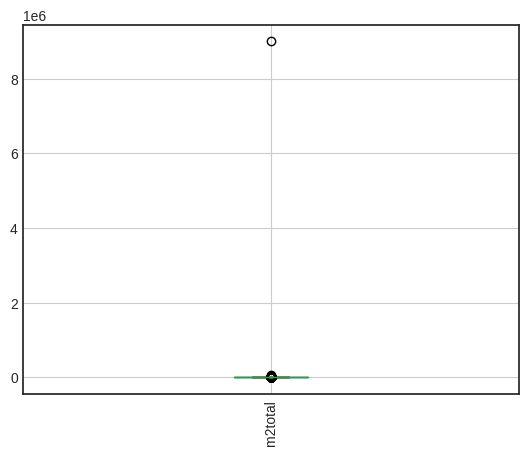

In [ ]:
#Observamos Valores Outliers en la Variable M2 Totales
df2.boxplot('m2total',rot=90)

Se observa que tenemos un outlier muy grande --> 9000000.0 m2, procederemos a analizarlo

In [ ]:
df2_filtrado = df2[df2['m2total'] >= 9000000.0]
df2_filtrado

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
2027,49757841,290.0,Casa - Villa Belgrano,Excelente casa en la mejor zona de Villa Belgr...,"Ampere AL al 6600, Villa Belgrano, Córdoba",Villa Belgrano,9000000,300.0,3.0,3.0,...,NaN,1,2.0,0,0,NaN,-3.134982e+16,-6.425702e+16,Casa Villa Belgrano,Casa


Se asume que los *m2totales* de la publicación 49757841 contienen un error de tipeo, por lo que le asignaremos el mismo valor que los m2cubiertos

In [ ]:
df2.loc[df2['idPost'] == 49757841, 'm2total'] = 300

Se observa nuevamente *Valores Outliers* en la Variable M2 Totales

<Axes: >

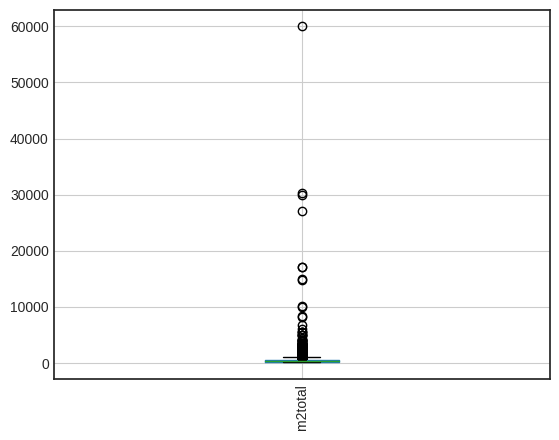

In [ ]:
df2.boxplot('m2total',rot=90)

Se analizaN los Outliers de la variable *M2TOTAL*

In [ ]:
df2_filtrado = df2[df2['m2total'] > 10000] # Ahora analizaremos aquellas publicaciones en las que los m2totales sean mayores a 10.000
df2_filtrado

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
1355,48820098,270.0,Camino a San Carlos Venta Lote Apto Emprendimi...,LOTE DE CASI 3HAS IDEAL BARRIO CERRADO / HOUSI...,"LOS SOCABONES 5100, Córdoba, Córdoba",Córdoba,27144,180.0,2.0,4.0,...,NaN,1,NaN,0,0,NaN,-3.144662e+16,-6.418284e+16,Camino San Carlos Venta Lote Apto Emprendimiento,Casa
3043,49778157,560.0,"Bella Casa en Venta, 3 Dorm., Pileta, Quincho ...",LOPEZ BAENA PROPIEDADES TIENE LA CASA DE TUS ...,"Lote 6, Manzana 14, Canelas Country Golf, Cañu...",Cañuelas Country Golf,15000,360.0,3.0,3.0,...,5.0,0,2.0,0,0,1.0,-3.147486e+16,-6.416392e+16,Bella Casa Venta Dorm Pileta Quincho Cañuelas ...,Casa
4670,45706713,1200.0,Casa - Quintas de Arguello,Es una propiedad con formato de castillo sobre...,"Ricardo Rojas Kilometro al 36500, Córdoba, Cór...",Córdoba,30214,1440.0,10.0,23.0,...,90.0,0,NaN,0,0,NaN,-3.134010e+16,-6.427238e+16,Casa Quintas Arguello,Casa
5440,47758817,1200.0,Casona Unquillo,Excelente casa para alquiler comercial muy bie...,"Los Algarrobos 41, Unquillo, Colón, Córdoba",Colón,10200,700.0,4.0,4.0,...,39.0,0,2.0,0,0,1.0,-3.124756e+16,-6.430325e+16,Casona Unquillo,Casa
5875,45722472,500.0,"Vendo Casa en Country Las Delicias, 4 Dorm.",La casa esta ubicada en la zona próxima al ing...,"las delicias, Las Delicias, Córdoba",Las Delicias,17000,450.0,5.0,NaN,...,18.0,0,4.0,0,0,1.0,-3.136977e+16,-6.429911e+16,Vendo Casa Country Delicias Dorm,Casa
5934,49751029,100.0,Se Vende Casa 3 Dorm con 17.000 m² de Terreno ...,Se VENDE CASA DE 300 m2 cubiertos y 17.000 m2 ...,"Camino a 60 Cuadras, Cárcano, Córdoba",Cárcano,17000,300.0,2.0,3.0,...,50.0,0,NaN,0,0,NaN,-3.146471e+16,-6.414784e+16,Vende Casa Dorm Terreno Camino Cuadras,Casa
6893,49404027,550.0,Villa Retiro / Gran Casa Quinta - Recibe Canje,VENTA GRAN CASA/QUINTA 6 HAS - EN VILLA GRAN P...,"Callejón Rinaldi , Villa Gran Parque, Córdoba",Villa Gran Parque,60000,460.0,4.0,4.0,...,22.0,0,2.0,0,0,NaN,-3.130969e+16,-6.415144e+16,Villa Retiro Casa Quinta Recibe Canje,Casa
6894,49404030,350.0,Venta / Casa Quinta Villa Retiro / 3 Has,VENTA GRAN CASA/QUINTA 3 HAS - EN VILLA GRAN P...,"Callejón Rinaldi , Villa Gran Parque, Córdoba",Villa Gran Parque,30000,460.0,4.0,4.0,...,22.0,0,2.0,0,0,NaN,-3.130969e+16,-6.415144e+16,Venta Casa Quinta Villa Retiro Has,Casa
7615,46934025,125.0,Casa en Venta en Camino 60 Cuadras - Zona Sur ...,FASSETTA INMOBILIARIA OFRECE EN VENTA CASA a M...,"callejon los Sosa 0, Cárcano, Córdoba",Cárcano,14748,138.0,2.0,3.0,...,35.0,0,1.0,0,0,NaN,-3.142008e+16,-6.418878e+16,Casa Venta Camino Cuadras Zona Sur Cordoba,Casa


In [ ]:
df2.loc[df2['idPost'] == 49778157, 'm2total'] = 1500
df2.loc[df2['idPost'] == 45722472, 'm2total'] = 1700

In [ ]:
df2_filtrado = df2[(df2['m2total'] > 3000) & (df2['m2total'] < 4000)] # Ahora analizaremos aquellas publicaciones en las que los m2totales sean menores a 4.000  y mayores a 3.000
df2_filtrado

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
1545,44466490,480.0,Venta Casa de 5 Dorm. en Barrio Villa Allende ...,Venta CASA de 5 dormitorios en Barrio Villa Al...,"Torino 80, Córdoba, Córdoba",Córdoba,3300,700.0,5.0,5.0,...,NaN,1,NaN,0,0,NaN,-3.142008e+16,-6.418878e+16,Venta Casa Dorm Barrio Villa Allende Golf,Casa
2201,48837296,590.0,Casa en Barrio Los Carolinos,GARCIA SAGUES INMOBILIARIA le ofrece: Import...,"San judas tadeo 8407, Córdoba, Córdoba",Córdoba,3970,450.0,NaN,4.0,...,NaN,1,NaN,0,0,NaN,-3.135070e+16,-6.428837e+16,Casa Barrio Carolinos,Casa
2621,49669098,195.0,Casa en Cordoba Capital,Espectacular CASA QUINTA en La Serranita - Sie...,"Cordoba, Córdoba, Córdoba",Córdoba,3600,123.0,2.0,3.0,...,NaN,1,NaN,0,0,NaN,-3.142008e+16,-6.418878e+16,Casa Cordoba Capital,Casa
3265,47376052,850.0,"Casa en Venta en Villa Allende - Cordoba, Unic...","Casa Moderna con detalles de categoria, diseña...",Guardarrama 100 - Villa Allende Golf - Cordoba...,Córdoba,3600,710.0,4.0,5.0,...,7.0,0,4.0,0,0,2.0,-3.127819e+16,-6.428265e+16,Casa Venta Villa Allende Cordoba Unica Irrepet...,Casa
3290,46129659,2500.0,Casa en Country Zona Norte Premium,Superficie de Terreno: propias 1800 m2 mas 150...,"Molino de Torres 6352, Lomas de los Carolinos,...",Lomas de los Carolinos,3300,1400.0,10.0,5.0,...,9.0,0,6.0,0,0,NaN,-3.134691e+16,-6.429695e+16,Casa Country Zona Norte Premium,Casa
4594,47783528,660.0,Casa - La Calera,JUAREZ BELTRAN S.A. - VENDE UBICACIÓN: Propie...,"El Bosque, Colón, Córdoba",Colón,3200,384.0,3.0,3.0,...,16.0,0,2.0,0,1,1.0,-3.134941e+16,-6.430880e+16,Casa Calera,Casa
4817,47865702,600.0,Venta Hermosa Casa con Gran Patio y Vista Al R...,Se VENDE hermosa CASA ubicada en el Barrio Cer...,"Eguia Zanon 10100, La Arboleda, Villa Warcalde",La Arboleda,3100,380.0,3.0,5.0,...,15.0,0,2.0,0,1,2.0,-3.133407e+16,-6.430495e+16,Venta Hermosa Casa Patio Vista Rio Arboleda,Casa
5489,49834340,180.0,Camino a San Carlos - Casa Quinta - 4 Dorm.,CHALET EN VENTA EN CAMINO A SAN CARLOS - TERRE...,"O´ Higgins al 9000, Camino a San Carlos, Córdoba",Camino a San Carlos,3400,300.0,3.0,4.0,...,40.0,0,1.0,0,0,NaN,-3.151246e+16,-6.416906e+16,Camino San Carlos Casa Quinta Dorm,Casa
5538,47702534,180.0,Casa en Venta en Ascochinga,Casa en muy buen estado de conservación. De ex...,"Ascochinga, Colón, Córdoba",Colón,3500,240.0,2.0,3.0,...,60.0,0,1.0,0,0,NaN,-3.094229e+16,-6.427699e+16,Casa Venta Ascochinga,Casa
5590,47461406,138.0,Casa 2 Dorm. Barrio Paso de Los Andes,HDH Propiedades presenta a la venta excelente ...,"Pasaje Félix Aguilar al 1500, Güemes, Córdoba",Güemes,3150,148.0,1.0,2.0,...,10.0,0,1.0,0,0,1.0,-3.141750e+16,-6.420720e+16,Casa Dorm Barrio Paso Andes,Casa


In [ ]:
df2.loc[df2['idPost'] == 47180010, 'm2total'] = 3000

Se encuentra más respaldo para continuar limpiando los *m2totales*, vamos a evaluar ahora los m2cubiertos.

In [ ]:
#Variable M2 Cubierto

df2['m2cubierto'] = df2['m2cubierto'].astype('Int64')
df2['m2cubierto'].describe()

<ipython-input-67-4f8674798640>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['m2cubierto'] = df2['m2cubierto'].astype('Int64')


count        7065.0
mean     211.900354
std      125.446519
min            25.0
25%           130.0
50%           179.0
75%           250.0
max          2200.0
Name: m2cubierto, dtype: Float64

In [ ]:
print("Valores perdidos de la variable M2 Cubiertos:", df2['m2cubierto'].isnull().sum())
print("Porcentaje de Valores perdidos de la variable M2 Cubiertos:", df2['m2cubierto'].isnull().sum()/len(df2)*100)

Valores perdidos de la variable M2 Cubiertos: 0
Porcentaje de Valores perdidos de la variable M2 Cubiertos: 0.0


Observamos Valores Outliers en la Variable **m2Cubiertos**

<Axes: >

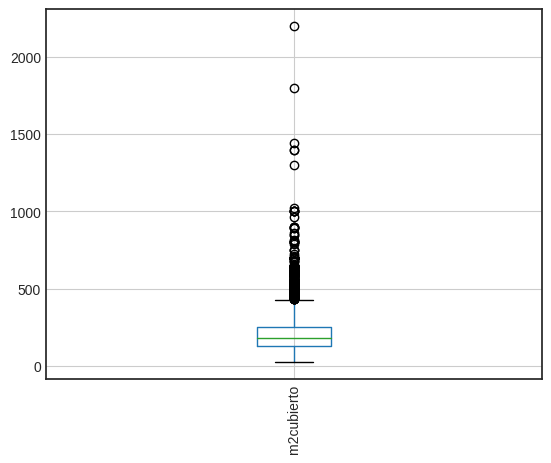

In [ ]:
df2.boxplot('m2cubierto',rot=90)

In [ ]:
df2_filtrado = df2[df2['m2cubierto'] > 1000] # Ahora analizaremos aquellas publicaciones en las que los m2cubierto sean mayores a 1.000
df2_filtrado

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
256,48803628,350.0,"Casa en Venta o Permuta Ubicado en Córdoba, Ar...",Casona en VentaUbicación: Avenida Juan B. Just...,"Avenida Juan B. Justo 8900, General Paz, Córdoba",General Paz,2200,2200,2.0,4.0,...,0.0,1,NaN,0,0,NaN,-3.131540e+16,-6.417595e+16,Casa Venta Permuta Ubicado Córdoba Argentina,Casa
3290,46129659,2500.0,Casa en Country Zona Norte Premium,Superficie de Terreno: propias 1800 m2 mas 150...,"Molino de Torres 6352, Lomas de los Carolinos,...",Lomas de los Carolinos,3300,1400,10.0,5.0,...,9.0,0,6.0,0,0,NaN,-3.134691e+16,-6.429695e+16,Casa Country Zona Norte Premium,Casa
3955,48377044,2500.0,Casa a La Venta en La Mejor Ubicación de Córdo...,6 dormitorios (5 en la casa principal más el l...,Casa a la Venta en la Mejor Ubicación de Córdo...,Cerro de las Rosas,3000,1300,8.0,6.0,...,15.0,0,4.0,0,0,NaN,-3.136523e+16,-6.423848e+16,Casa Venta Ubicación Córdoba Hugo Wast Fondo B...,Casa
4004,48377043,2500.0,Lomas de La Carolina a La Venta Pensada Como u...,Una propiedad pensada como un hotel para disfr...,Lomas de La Carolina a la Venta Pensada Como u...,Lomas de la Carolina,2800,1400,7.0,5.0,...,10.0,0,8.0,0,1,NaN,-3.135281e+16,-6.430011e+16,Lomas Carolina Venta Pensada Hotel Familia Amigos,Casa
4670,45706713,1200.0,Casa - Quintas de Arguello,Es una propiedad con formato de castillo sobre...,"Ricardo Rojas Kilometro al 36500, Córdoba, Cór...",Córdoba,30214,1440,10.0,23.0,...,90.0,0,NaN,0,0,NaN,-3.134010e+16,-6.427238e+16,Casa Quintas Arguello,Casa
4714,46710320,350.0,Casa de 4 Dorm. en Venta B° Guiñazu,Dicho en inmueble se encuentra ubicado en Juan...,"juan b. justo 8085, Guiñazú, Córdoba",Guiñazú,1800,1800,NaN,4.0,...,60.0,0,NaN,0,0,NaN,-3.132623e+16,-6.417581e+16,Casa Dorm Venta Guiñazu,Casa
5618,45459908,1400.0,Casa a La Venta en Las Delicias Country Club.,CASA A LA VENTA EN LAS DELICIAS COUNTRY CLUB.1...,"Del Peje 9100, Las Delicias, Córdoba",Las Delicias,3300,1022,6.0,4.0,...,23.0,0,NaN,0,0,NaN,-3.136777e+16,-6.430018e+16,Casa Venta Delicias Country Club,Casa


Se analizán aquellas publicaciones en la que el valor de la columna **m2total** sea el mismo que el valor de la columna **m2cubiertos** y a su vez los **m2cubiertos** sean mayores a 500*

In [ ]:
df2_filtrado = df2[(df2['m2total'] == df2['m2cubierto']) & (df2['m2cubierto'] > 500)]
df2_filtrado

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
14,47942290,1100.0,Casa de Categoría en Las Delicias Country,GRIMAUT LOPEZ LE OFRECE EN ESTA OPORTUNIDAD CA...,"Las Delicias Country Lote / N° 0, Las Delicias...",Las Delicias,1000,1000,5.0,4.0,...,0.0,1,8.0,0,0,NaN,-3.136398e+16,-6.429817e+16,Casa Categoría Delicias Country,Casa
75,47800110,148.0,Propiedad en B° San Martín - a Demoler,"Se vende Propiedad a demoler en B° San Martín,...","Soldado Ruíz 2600, San Martín, Córdoba",San Martín,593,593,3.0,3.0,...,0.0,1,5.0,0,0,NaN,-3.137927e+16,-6.420387e+16,Propiedad San Martín Demoler,Casa
256,48803628,350.0,"Casa en Venta o Permuta Ubicado en Córdoba, Ar...",Casona en VentaUbicación: Avenida Juan B. Just...,"Avenida Juan B. Justo 8900, General Paz, Córdoba",General Paz,2200,2200,2.0,4.0,...,0.0,1,NaN,0,0,NaN,-3.131540e+16,-6.417595e+16,Casa Venta Permuta Ubicado Córdoba Argentina,Casa
2951,43373746,690.0,Casa - Residencial Velez Sarsfield,"En Barrio Velez Sarfield, se encuentra esta pr...","Velez Sarsfield al 3000, Córdoba, Córdoba",Córdoba,590,590,1.0,3.0,...,NaN,1,3.0,0,0,1.0,-3.144610e+16,-6.419874e+16,Casa Residencial Velez Sarsfield,Casa
4415,49616366,130.0,Excelente. Casa 4 Dorm.. Doble Cochera. Zona R...,VENTA Casa. En inmejorable entorno. Zona resid...,"Olmos de Aguilera 5100, Teodoro Felds, Córdoba",Teodoro Felds,570,570,2.0,4.0,...,35.0,0,2.0,0,0,NaN,-3.139701e+16,-6.424924e+16,Excelente Casa Dorm Doble Cochera Zona Residen...,Casa
4714,46710320,350.0,Casa de 4 Dorm. en Venta B° Guiñazu,Dicho en inmueble se encuentra ubicado en Juan...,"juan b. justo 8085, Guiñazú, Córdoba",Guiñazú,1800,1800,NaN,4.0,...,60.0,0,NaN,0,0,NaN,-3.132623e+16,-6.417581e+16,Casa Dorm Venta Guiñazu,Casa
5007,49811420,420.0,Importante Propiedad Esquina (Dean Funes y Urq...,Excelente Inmueble ubicado en calle Dean Funes...,"Dean Funes y Urquiza, Centro, Córdoba",Centro,650,650,8.0,18.0,...,60.0,0,NaN,0,0,NaN,-3.141281e+16,-6.419477e+16,Importante Propiedad Esquina Dean Funes Urquiz...,Casa
5485,49500970,378.0,Casa - Cofico,Sergio Villella Bienes Inmuebles les presenta ...,"Faustino Allende al 400, Cofico, Córdoba",Cofico,538,538,3.0,3.0,...,36.0,0,3.0,0,0,1.0,-3.140102e+16,-6.418417e+16,Casa Cofico,Casa
5496,47176953,500.0,Casa - Cerro de Las Rosas - Sobre Tejeda - Bomba!,ALQUILADA EN U$S 1.000 MENSUALES HASTA AGOSTO ...,Luis de Tejeda 3900 Casi esq Victorino Rodrígu...,Cerro de las Rosas,516,516,5.0,4.0,...,15.0,0,2.0,0,1,NaN,-3.137330e+16,-6.423147e+16,Casa Cerro Rosas Tejeda Bomba,Casa
5799,48637386,99.9,Venta Bº Colon Cadiz m² Casa + Dpto + Galpon +...,Inmueble ubicado en barrio Colón sobre calle C...,"CADIZ 2646 , Colón, Córdoba",Colón,722,722,2.0,2.0,...,17.0,0,2.0,0,0,2.0,-3.143675e+16,-6.415557e+16,Venta Bº Colon Cadiz Casa Dpto Galpon Lote,Casa


In [ ]:
df2.loc[df2['idPost'] == 49616366, 'm2cubierto'] = 370
df2.loc[df2['idPost'] == 48637386, 'm2cubierto'] = 290
df2.loc[df2['idPost'] == 49811420, 'm2total'] = 326
df2.loc[df2['idPost'] == 49584666, 'm2total'] = 1500
df2.loc[df2['idPost'] == 49639620, 'm2total'] = 1044
df2.loc[df2['idPost'] == 49371282, 'm2total'] = 1900
df2.loc[df2['idPost'] == 49448016, 'm2total'] = 1045
df2.loc[df2['idPost'] == 49096492, 'm2total'] = 738
df2.loc[df2['idPost'] == 46587402, 'm2total'] = 1615

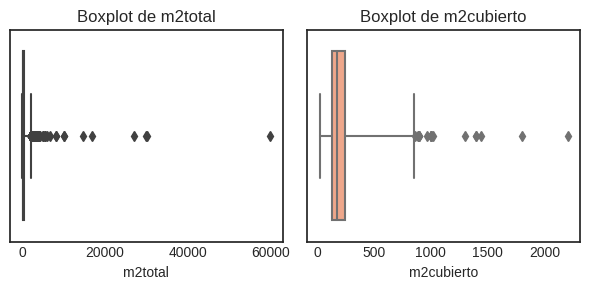

In [ ]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Primer gráfico (m2total)
sns.boxplot(x=df2['m2total'], whis=5, color="#00B8D9", ax=axes[0])
axes[0].set_title("Boxplot de m2total")
axes[0].set_xlabel("m2total")

# Segundo gráfico (m2cubierto)
sns.boxplot(x=df2['m2cubierto'], whis=5, color="#FFA07A", ax=axes[1])
axes[1].set_title("Boxplot de m2cubierto")
axes[1].set_xlabel("m2cubierto")

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Retomaremos ahora el análisis de outliers que vimos anteriormente

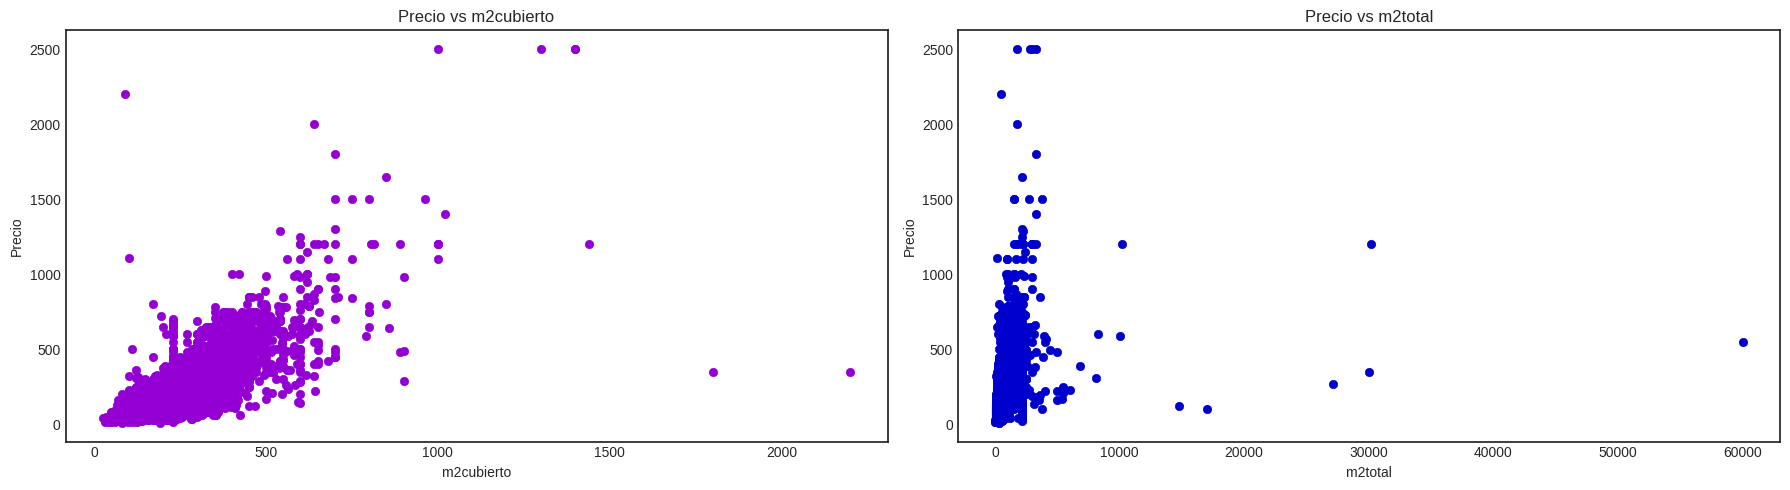

In [ ]:
# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Gráfico 1
axes[0].scatter(x=df2['m2cubierto'], y=df2['Precio'],
                color="DarkViolet", edgecolors="#9400D3", linewidths=0.5)
axes[0].set_xlabel("m2cubierto")
axes[0].set_ylabel("Precio")
axes[0].set_title("Precio vs m2cubierto")

# Gráfico 2
axes[1].scatter(x=df2['m2total'], y=df2['Precio'],
                color="MediumBlue", edgecolors="#0000CD", linewidths=0.5)
axes[1].set_xlabel("m2total")
axes[1].set_ylabel("Precio")
axes[1].set_title("Precio vs m2total")


plt.tight_layout()
plt.show()

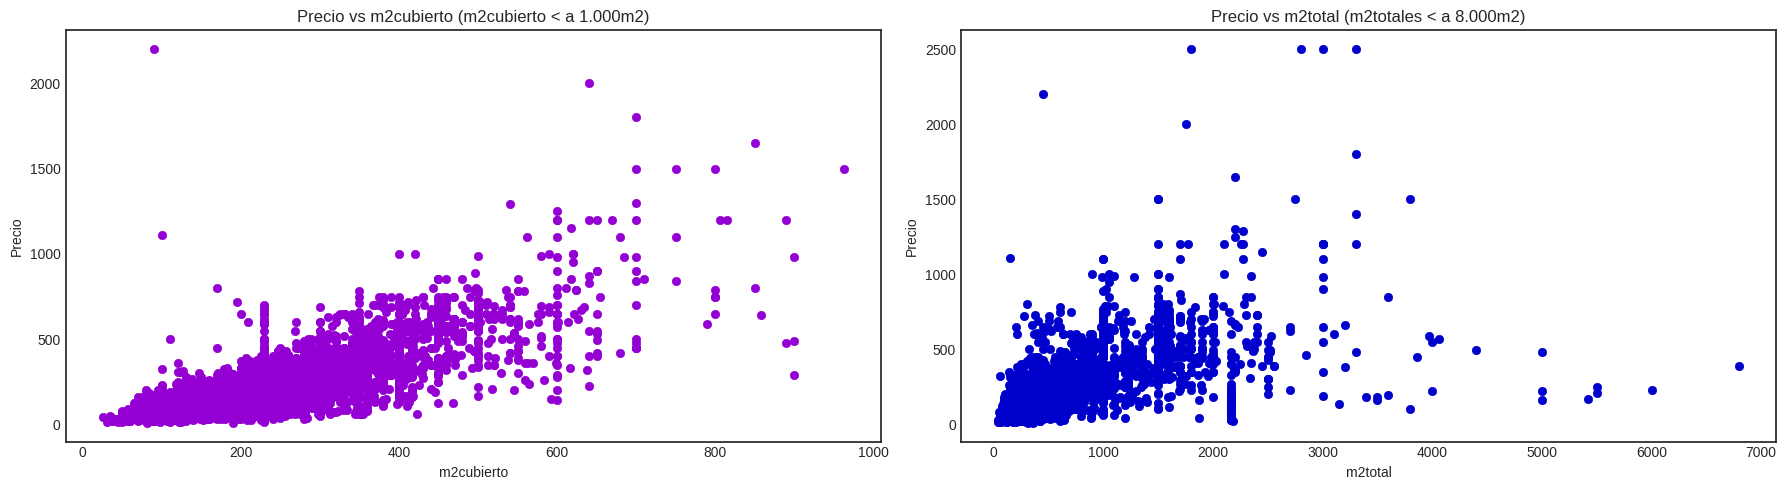

In [ ]:
# Filtro m2cubierto > 1000
filtro_m2cub = df2[df2['m2cubierto'] < 1000]
filtro_m2tot = df2[df2['m2total'] < 8000]

# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Gráfico 1
axes[0].scatter(x=filtro_m2cub['m2cubierto'], y=filtro_m2cub['Precio'],
                color="DarkViolet", edgecolors="#9400D3", linewidths=0.5)
axes[0].set_xlabel("m2cubierto")
axes[0].set_ylabel("Precio")
axes[0].set_title("Precio vs m2cubierto (m2cubierto < a 1.000m2)")

# Gráfico 2
axes[1].scatter(x=filtro_m2tot['m2total'], y=filtro_m2tot['Precio'],
                color="MediumBlue", edgecolors="#0000CD", linewidths=0.5)
axes[1].set_xlabel("m2total")
axes[1].set_ylabel("Precio")
axes[1].set_title("Precio vs m2total (m2totales < a 8.000m2)")


plt.tight_layout()
plt.show()

Analizando los gráficos, concluimos que sería una buena decisión trabajar con aquellas publicaciones en las que los m2cubiertos sean menores a 1.000 y los m2totales sean menores a 8.000, ya que estamos en presencia de valores atípicos para una casa en venta

In [ ]:
df2 = df2[df2['m2cubierto'] <= 1000]
df2= df2[df2['m2total'] <= 8000]

##### ***1.6.2 📉 Análisis de Variables Cuantitativas:Baños y Toilettes***

Variable Baños: Cantidad de baños declarados por el vendedor

In [ ]:
df2['Banos'].describe()

count    6841.000000
mean        2.352726
std         1.078896
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: Banos, dtype: float64

In [ ]:
print("Valores perdidos de la variable Baños:", df2['Banos'].isnull().sum())

Valores perdidos de la variable Baños: 208


In [ ]:
print("Porcentaje de Valores perdidos de la variable Baños:", df2['Banos'].isnull().sum()/len(df2)*100)

Porcentaje de Valores perdidos de la variable Baños: 2.950773159313378


In [ ]:
# Filtra las filas donde 'Banos' es nulo
filas_con_nan = df2[df2['Banos'].isna()]
filas_con_nan

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
30,49802617,98.0,Prados de Manantiales - 3 Dorm. - 2 Baños,DÚPLEX a estrenar en el Barrio PRADOS DE MANAN...,"Impira Lote / N° 0, Córdoba, Córdoba",Córdoba,110,92,NaN,NaN,...,0.0,1,NaN,0,0,NaN,-3.147565e+16,-6.426002e+16,Prados Manantiales Dorm Baños,Duplex
77,48987788,87.0,Parque Horizonte Oportunidad - Frente a La Pla...,FISER SERVICIOS INMOBILIARIOS OFRECE: Casa ubi...,", Córdoba, Córdoba",Córdoba,300,300,NaN,3.0,...,0.0,1,NaN,0,0,NaN,-3.142008e+16,-6.418878e+16,Parque Horizonte Oportunidad Frente Plaza Dorm...,Casa
93,49148677,102.0,San Ignacio Village Unidad Lista Para Habitar ...,FISER SERVICIOS INMOBILIARIOS OFRECE :Hermoso ...,", San Ignacio Village, Córdoba",San Ignacio Village,102,92,NaN,2.0,...,0.0,1,NaN,0,0,NaN,-3.139187e+16,-6.424916e+16,San Ignacio Village Unidad Lista Habitar Duple...,Duplex
95,48711262,95.0,Vitta Housing! Zona Norte - 2 y 3 Dor - Patio ...,[RETASADO] FISER Servicios Inmobiliarios te of...,"Padre Claret 6850, Los Boulevares, Córdoba",Los Boulevares,150,115,NaN,3.0,...,0.0,1,NaN,0,0,NaN,-3.134395e+16,-6.423532e+16,Vitta Housing Zona Norte Dor Patio asador Gge ...,Duplex
97,48955405,135.0,Manantiales II - Duplex - Diseño E Innovacion ...,FISER Servicios Inmobiliarios te ofrece en est...,"rio negro esq cruz roja - parada 10, Manantial...",Manantiales,180,180,NaN,3.0,...,0.0,1,NaN,0,0,NaN,-3.146593e+16,-6.422058e+16,Manantiales II Duplex Diseño Innovacion Dor Bñ...,Duplex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,47583909,52.0,Casa en Venta Calle Juana Azurduy 442 en Bº Tr...,CASA EN VENTA EN Bº ALTO ALBERDI Juana Azurd...,"Juana Azurduy, Alto Alberdi, Córdoba",Alto Alberdi,252,132,NaN,2.0,...,20.0,0,NaN,0,0,NaN,-3.140813e+16,-6.422771e+16,Casa Venta Calle Juana Azurduy Bº Tranviarios,Casa
7523,47709057,45.0,Vendo Casa a Refaccionar en Av Alem Al 1700,"VENDO CASA A REFACCIONAR, EXCELENTE UBICACIÓN ...","Av Alem , Córdoba, Córdoba",Córdoba,218,157,NaN,NaN,...,50.0,0,NaN,0,0,NaN,-3.138352e+16,-6.415738e+16,Vendo Casa Refaccionar Av Alem,Casa
7665,45468587,138.0,Bajo Palermo 3 Dor Ste Patio Ex Ub Recibe Meno...,LIVING COMEDOR COCINA CON AMOBLAMIENTOS Y LAVA...,"RUFINO CUERVO, Bajo Palermo, Córdoba",Bajo Palermo,252,125,NaN,NaN,...,20.0,0,NaN,0,0,NaN,-3.138697e+16,-6.422403e+16,Palermo Dor Ste Patio Ex Ub Recibe Menor Rojas...,Casa
7777,33042376,370.0,Casa 4 Dorm. - Cerro de Las Rosas - Pasaje a 1400,Excelente propiedad ubicada en pleno Cerro de ...,"Pasaje A , Cerro de las Rosas, Córdoba",Cerro de las Rosas,505,377,NaN,4.0,...,10.0,0,2.0,1,0,NaN,-3.143437e+16,-6.422198e+16,Casa Dorm Cerro Rosas Pasaje,Casa


Para asignarle valor a las celdas vacias de **Baños**, se realizan los siguientes pasos:

Si hay info dentro de la columna **title** o **Description**, se aprovechará. Se asignará el valor UNO en caso de que no contemos con información en las columnas anteriores.

In [ ]:
# Crear una función para asignar valores a 'Banos' basados en 'title' y 'Description'
def asignar_banos(row):
    title = str(row['title']).lower()
    description = str(row['Description']).lower()

    if any(keyword in title for keyword in ['2 baños', '2 bños']) or any(keyword in description for keyword in ['2 baños', '2 bños', 'dos baños']):
        return 2
    elif any(keyword in title for keyword in ['3 baños', '3 bños']) or any(keyword in description for keyword in ['3 baños', '3 bños', 'tres baños']):
        return 3
    elif any(keyword in title for keyword in ['4 baños', '4 bños']) or any(keyword in description for keyword in ['4 baños', '4 bños', 'cuatro baños']):
        return 3
    elif any(keyword in title for keyword in ['5 baños', '5 bños']) or any(keyword in description for keyword in ['5 baños', '5 bños', 'cinco baños']):
        return 3
    else:
        return row['Banos']

# Aplicar la función para actualizar 'Banos' solo en las filas donde 'Banos' sea nulo
df2.loc[:, 'Banos'] = df2.apply(lambda row: asignar_banos(row) if pd.isnull(row['Banos']) else row['Banos'], axis=1)

print("Valores perdidos de la variable Baños:", df2['Banos'].isnull().sum())
print("Porcentaje de Valores perdidos de la variable Baños:", df2['Banos'].isnull().sum()/len(df2)*100)
print('')

Valores perdidos de la variable Baños: 138
Porcentaje de Valores perdidos de la variable Baños: 1.957724499929068



In [ ]:
# Filtra las filas donde 'Banos' es nulo
filas_con_nan = df2[df2['Banos'].isna()]
filas_con_nan

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
115,48711501,75.0,Marques - 3 Dor - Bño - Gge - Patio - Seg 24 H...,[RETASADO] FISER Servicios Inmobiliarios te fr...,"DIEGO DIAZ 700, Marqués de Sobremonte, Córdoba",Marqués de Sobremonte,125,100,NaN,3.0,...,0.0,1,NaN,0,0,NaN,-3.135872e+16,-6.419595e+16,Marques Dor Bño Gge Patio Seg Hs Estrenar,Duplex
229,47522614,160.0,"Hermosa Casa Para Hostel, Residencia.",XINTEL(CPS-CPS-655) Venta de Casa 6 DORMITORIO...,"Bv Las Heras 400. Entre Avellaneda y Jujuy, Co...",Cofico,130,260,NaN,6.0,...,0.0,1,NaN,0,0,NaN,-3.140557e+16,-6.418739e+16,Hermosa Casa Hostel Residencia,Casa
230,47471486,120.0,Casa de Dos Dorm. en Barrio Gandhi de Horizonte.,XINTEL(CPS-CP3-652) Casa en excelente estado d...,"Calle 2 1700, Santina Norte, Córdoba",Santina Norte,130,130,NaN,2.0,...,0.0,1,2.0,0,0,NaN,-3.136864e+16,-6.427601e+16,Casa Dorm Barrio Gandhi Horizonte,Casa
259,49243553,70.0,Venta Casa Gral. Bustos 3 Dorm y Local Gran Co...,SE VENDE CASA DE 3 DORM. + LOCAL EN ESQUINA !!...,"Pablo Rodriguez Al 800, General Bustos, Córdoba",General Bustos,267,272,NaN,3.0,...,0.0,1,1.0,0,0,NaN,-3.139073e+16,-6.417374e+16,Venta Casa Bustos Dorm Local Comercial,Casa
351,49834200,130.0,Se Vende Casa en Cordoba Capital,SE VENDE CASA EN CORDOBA CAPITAL\n -- EL VALOR...,"Urquiza 1300, Córdoba, Córdoba",Córdoba,231,197,NaN,NaN,...,0.0,1,1.0,0,0,NaN,-3.172826e+16,-6.500456e+16,Vende Casa Cordoba Capital,Casa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,47583909,52.0,Casa en Venta Calle Juana Azurduy 442 en Bº Tr...,CASA EN VENTA EN Bº ALTO ALBERDI Juana Azurd...,"Juana Azurduy, Alto Alberdi, Córdoba",Alto Alberdi,252,132,NaN,2.0,...,20.0,0,NaN,0,0,NaN,-3.140813e+16,-6.422771e+16,Casa Venta Calle Juana Azurduy Bº Tranviarios,Casa
7523,47709057,45.0,Vendo Casa a Refaccionar en Av Alem Al 1700,"VENDO CASA A REFACCIONAR, EXCELENTE UBICACIÓN ...","Av Alem , Córdoba, Córdoba",Córdoba,218,157,NaN,NaN,...,50.0,0,NaN,0,0,NaN,-3.138352e+16,-6.415738e+16,Vendo Casa Refaccionar Av Alem,Casa
7665,45468587,138.0,Bajo Palermo 3 Dor Ste Patio Ex Ub Recibe Meno...,LIVING COMEDOR COCINA CON AMOBLAMIENTOS Y LAVA...,"RUFINO CUERVO, Bajo Palermo, Córdoba",Bajo Palermo,252,125,NaN,NaN,...,20.0,0,NaN,0,0,NaN,-3.138697e+16,-6.422403e+16,Palermo Dor Ste Patio Ex Ub Recibe Menor Rojas...,Casa
7777,33042376,370.0,Casa 4 Dorm. - Cerro de Las Rosas - Pasaje a 1400,Excelente propiedad ubicada en pleno Cerro de ...,"Pasaje A , Cerro de las Rosas, Córdoba",Cerro de las Rosas,505,377,NaN,4.0,...,10.0,0,2.0,1,0,NaN,-3.143437e+16,-6.422198e+16,Casa Dorm Cerro Rosas Pasaje,Casa


In [ ]:
# Función para contar la cantidad de veces que aparece "Baño" en la columna 'Description'
def contar_banos(description):
    if pd.notna(description):
        return description.lower().count("baño")
    else:
        return None

# Aplicar la función para actualizar 'Banos' solo en las filas donde 'Banos' sea nulo
df2.loc[:, 'Banos'] = df2.apply(lambda row: contar_banos(row['Description']) if pd.isnull(row['Banos']) else row['Banos'], axis=1)

In [ ]:
#Reemplazamos los valores faltantes de baños por el número 1
df2.loc[:, 'Banos'] = df2['Banos'].replace(0, 1)
print("Valores faltantes en baños luego del ajuste:", df2['Banos'].isnull().sum())

Valores faltantes en baños luego del ajuste: 1


In [ ]:
filas_con_nan = df2[df2['Banos'].isna()]
filas_con_nan

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
1840,48443383,135.0,Casa - Cordoba Capital,NaN,"Solares DE Manantiales, Córdoba, Córdoba",Córdoba,2165,229,NaN,NaN,...,NaN,1,NaN,0,0,NaN,-3.139117e+16,-6.412137e+16,Casa Cordoba Capital,Casa


In [ ]:
# Eliminar la fila donde 'idPost' es igual a "48443383"
df2 = df2.drop(df2[df2['idPost'] == 48443383].index)

In [ ]:
filas_con_nan = df2[df2['Banos'].isna()]
filas_con_nan

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,...,Antiguedad,Estrenar,Cochera,Estado,Luminoso,Toilette,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type


(array([1.545e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.776e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.869e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.130e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

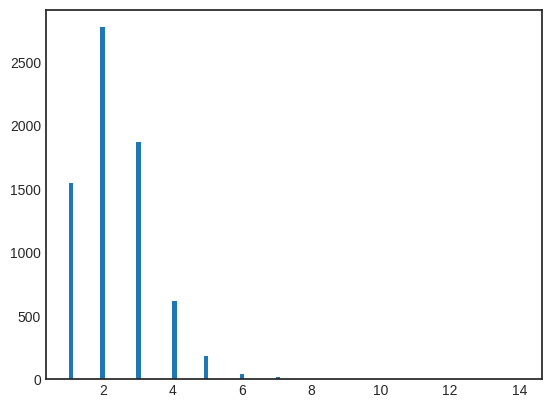

In [ ]:
#Graficamos la variable baños
plt.hist(df2['Banos'], 100)

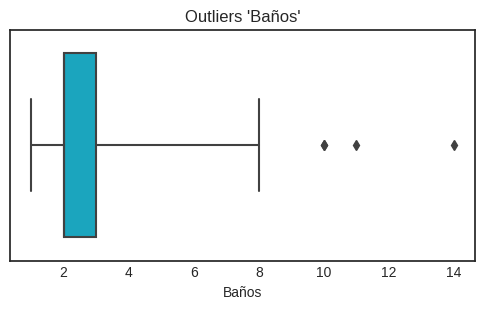

In [ ]:
#Observamos Valores Outliers en la Variable Baños

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df2['Banos'], whis=5, color="#00B8D9", ax=ax)
ax.set_title("Outliers 'Baños'")
ax.set_xlabel("Baños")

# Mostrar el gráfico
plt.show()


#Observamos algunos outliers en la variable baños

In [ ]:
#Variable Toilette: Cantidad de toilettes declarados por el vendedor

df2['Toilette'].describe()

count    1544.000000
mean        1.068005
std         0.375755
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: Toilette, dtype: float64

In [ ]:
print("Valores perdidos de la variable Toilette:", df2['Toilette'].isnull().sum())
print("Porcentaje de Valores perdidos de la variable Toilette:", df2['Toilette'].isnull().sum()/len(df2)*100,'%')

Valores perdidos de la variable Toilette: 5504
Porcentaje de Valores perdidos de la variable Toilette: 78.09307604994325 %


(array([1.461e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.100e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

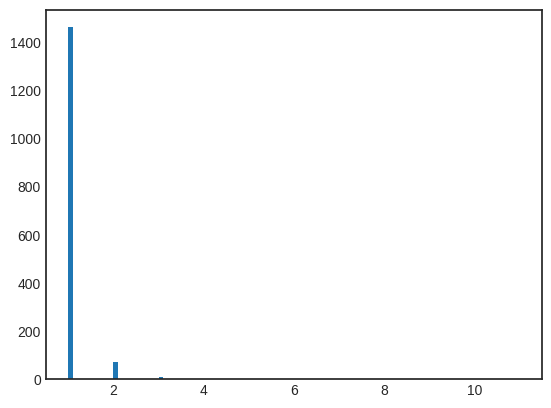

In [ ]:
plt.hist(df2['Toilette'], 100)

<Axes: >

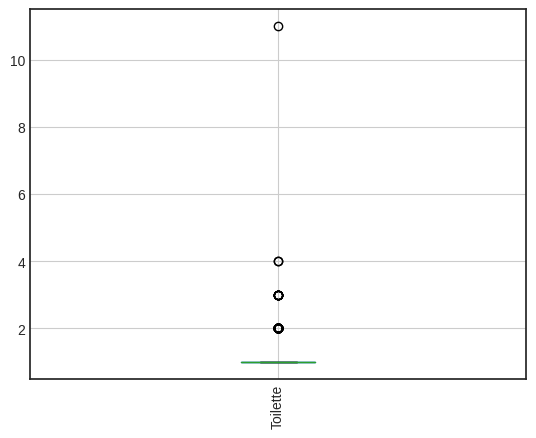

In [ ]:
#Observamos Valores Outliers en la Variable Toilette

df2.boxplot('Toilette',rot=90)

#Observamos algunos outliers en la variable Toilette

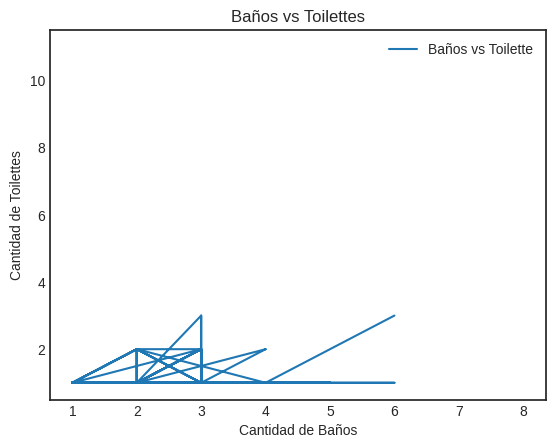

In [ ]:
#Graficamos la relación entre Baños y Toilettes

plt.plot(df2['Banos'], df2['Toilette'], label="Baños vs Toilette")

plt.xlabel('Cantidad de Baños')
plt.ylabel('Cantidad de Toilettes')
plt.title('Baños vs Toilettes')
plt.legend();

Luego de analizar esta variable y ver la cantidad de faltantes y a su vez comprendiendo que es un campo que genera muchas interpretaciones distintas para quien publica el anuncio, y que no presenta una relación clara con la variable "Baños", decidimos desestimarla de nuestro análisis.

In [ ]:
#Desestimamos la columna Toilette

df2.drop(columns=['Toilette'], inplace=True)

##### ***1.6.3 📉 Análisis de Variables Cuantitativas:Dormitorio, Ambiente y Cocheras***

Se da inicio al análisis por Dormitorio:

📌 **Dormitorio**

In [ ]:
#Variables Dormitorios

df2['Dormitorios'].describe()

count    6859.000000
mean        3.090684
std         0.930322
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max        20.000000
Name: Dormitorios, dtype: float64

In [ ]:
print("Valores perdidos de la variable Dormitorios:", df2['Dormitorios'].isnull().sum())
print("Porcentaje de Valores perdidos de la variable Dormitorios:", df2['Dormitorios'].isnull().sum()/len(df2)*100)

Valores perdidos de la variable Dormitorios: 189
Porcentaje de Valores perdidos de la variable Dormitorios: 2.68161180476731


In [ ]:
#Observaremos las publicaciones en donde no contamos con información sobre la cantidad de Dormitorios
filas_con_nan = df2[df2['Dormitorios'].isna()]
filas_con_nan

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,Ambientes,Antiguedad,Estrenar,Cochera,Estado,Luminoso,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
30,49802617,98.0,Prados de Manantiales - 3 Dorm. - 2 Baños,DÚPLEX a estrenar en el Barrio PRADOS DE MANAN...,"Impira Lote / N° 0, Córdoba, Córdoba",Córdoba,110,92,2.0,NaN,NaN,0.0,1,NaN,0,0,-3.147565e+16,-6.426002e+16,Prados Manantiales Dorm Baños,Duplex
79,49740362,23.9,Vargez Vende Casa en Cosquín Calle de Las Arma...,VARGEZ Vende casa en construcción con amplio t...,"Cosquín, A.A.T.R.A., Córdoba",A.A.T.R.A.,2182,44,2.0,NaN,1.0,0.0,1,1.0,0,0,-3.121434e+16,-6.447367e+16,Vargez Vende Casa Cosquín Calle Armaduras,Casa
143,44168380,382.0,Vendo Importante Casa en Guemes 3 Dorm.,Casa sobre Simón Bolivar que consta de living ...,"Bolivar 500, Güemes, Córdoba",Güemes,395,241,2.0,NaN,NaN,0.0,1,NaN,0,0,-3.140876e+16,-6.416228e+16,Vendo Importante Casa Guemes Dorm,Casa
210,45612862,250.0,Venta Casa 3 Dorm. 3 Baños Pileta Cerro de Las...,Casa en una planta que consta de: * Living\n* ...,"Jose Roque Funes 1500, Cerro de las Rosas, Cór...",Cerro de las Rosas,734,237,3.0,NaN,NaN,0.0,1,NaN,0,0,-3.137379e+16,-6.424074e+16,Venta Casa Dorm Baños Pileta Cerro Rosas,Casa
351,49834200,130.0,Se Vende Casa en Cordoba Capital,SE VENDE CASA EN CORDOBA CAPITAL\n -- EL VALOR...,"Urquiza 1300, Córdoba, Córdoba",Córdoba,231,197,3.0,NaN,NaN,0.0,1,1.0,0,0,-3.172826e+16,-6.500456e+16,Vende Casa Cordoba Capital,Casa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,47190771,50.0,"Apto Crédito, Casa de Cuatro Dorm., Dos Baños",La casa está desarrollada en una sola planta C...,"luyaba, Santa Isabel, Córdoba",Santa Isabel,540,103,2.0,NaN,4.0,31.0,0,1.0,0,0,-3.148095e+16,-6.423960e+16,Apto Crédito Casa Dorm Baños,Casa
7807,43319516,85.0,Alberdi Para Construir en Altura,"CASA PARA DEMOLER, FOS 80%, RETIRO 45 GRADOS H...","LA RIOJA 987, Centro, Córdoba",Centro,209,229,1.0,NaN,NaN,40.0,0,NaN,0,0,-3.140752e+16,-6.419549e+16,Alberdi Construir Altura,Casa
7824,43708615,75.0,Vendo Casa 2 Dorm. (Apta Cred.),"Hermosa casa, ubicación privilegiada, todos lo...","Lavalleja 3448, Panamericano, Córdoba",Panamericano,250,115,1.0,NaN,7.0,50.0,0,NaN,0,0,-3.137475e+16,-6.418232e+16,Vendo Casa Dorm Apta Cred,Casa
7855,44539734,250.0,Parque Velez Sarsfield Naciones Unidas a m Hos...,A POCAS CDRAS HOSPITAL PRIVADO GRAN LIVING COM...,"NACIONES UNIDAD 600, Parque Vélez Sársfield, C...",Parque Vélez Sársfield,370,261,2.0,NaN,NaN,44.0,0,NaN,0,1,-3.144235e+16,-6.420151e+16,Parque Velez Sarsfield Naciones Unidas Hosp Pr...,Casa


In [ ]:
# Crear una función para asignar valores a 'Dormitorios' basados en 'title' y 'Description'
def asignar_dormitorios(row):
    title = str(row['title']).lower()
    description = str(row['Description']).lower()

    if any(keyword in title for keyword in ['3 dorm', 'tres dorm.', '3 dor!', '3 dorm.', '3 hab', '3 dor']) or any(keyword in description for keyword in ['3 dormitorios', 'tres dormitorios', '3 dor','3 habitaciones', '3 amplios dormitorios']):
        return 3
    elif any(keyword in title for keyword in ['4 dorm', '4 dorm.']) or any(keyword in description for keyword in ['4 dormitorios', 'cuatro dormitorios']):
        return 4
    elif any(keyword in title for keyword in ['dos dorm.', '2 dorm!', '2 dorm']) or any(keyword in description for keyword in ['dos dormitorios', '2 dormitorios']):
        return 2
    elif any(keyword in title for keyword in ['5 dorm.', '5 dorm']) or any(keyword in description for keyword in ['cinco dormitorios', '5 dormitorios']):
        return 5
    elif 'monoambiente' in title or 'monoambiente' in description :
        return 0
    elif any(keyword in title for keyword in ['1 dormitorio', '1 dorm']):
        return 1
    else:
        return row['Dormitorios']

# Aplicar la función para actualizar 'Dormitorios'
df2['Dormitorios'] = df2.apply(asignar_dormitorios, axis=1)

print("Valores perdidos de la variable Dormitorios:", df2['Dormitorios'].isnull().sum())

Valores perdidos de la variable Dormitorios: 34


In [ ]:
#Observaremos las publicaciones en donde no contamos con información sobre la cantidad de Dormitorios
filas_con_nan = df2[df2['Dormitorios'].isna()]
filas_con_nan

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,Ambientes,Antiguedad,Estrenar,Cochera,Estado,Luminoso,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
79,49740362,23.9,Vargez Vende Casa en Cosquín Calle de Las Arma...,VARGEZ Vende casa en construcción con amplio t...,"Cosquín, A.A.T.R.A., Córdoba",A.A.T.R.A.,2182,44,2.0,NaN,1.0,0.0,1,1.0,0,0,-3.121434e+16,-6.447367e+16,Vargez Vende Casa Cosquín Calle Armaduras,Casa
995,44070915,167.0,Casa - Villa Allende - Atención Constructores,Importante terreno en pleno centro de Villa Al...,"Saavedra al 200, Córdoba, Córdoba",Córdoba,1112,160,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.129387e+16,-6.429576e+16,Casa Villa Allende Atención Constructores,Casa
1547,48103086,220.0,Casa - La Salle,"Casa + Duplex , ubicados en Barrio Lasalle, en...","Andres Piñero, Córdoba, Córdoba",Córdoba,240,240,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.134639e+16,-6.425582e+16,Casa Salle,Duplex
1639,48111320,220.0,Casa - La Salle,"Casa + Duplex , ubicados en Barrio Lasalle, en...","Andres Piñero, La Salle, Córdoba",La Salle,240,240,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.134639e+16,-6.425582e+16,Casa Salle,Duplex
1843,44590193,15.0,Ampliacion Altamira Casa Para Demoler Ó Refacc...,AMPLIACION ALTAMIRA CASA A DEMOLER 290 m2 terr...,"Domingo Mateau al 4000, Córdoba, Córdoba",Córdoba,290,229,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.144419e+16,-6.418458e+16,Ampliacion Altamira Casa Demoler Refaccionar,Casa
2630,49697368,230.0,Casa - Cofico,COFICOSE VENDE CASA EN EXCELENTE UBICACIONIDEA...,"Faustino Allende al 600, Cofico, Córdoba",Cofico,345,217,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.140014e+16,-6.418700e+16,Casa Cofico,Casa
2957,43226495,63.0,"Casa en Venta, Localidad Las Rosas, a Reciclar",Casa a reciclar en Villa de las rosas sobre ru...,"ruta 14 s/n, Córdoba, Córdoba",Córdoba,1100,229,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.193366e+16,-6.503959e+16,Casa Venta Localidad Rosas Reciclar,Casa
2974,42678062,780.0,Casa - Jardin Espinosa,HDH PROPIEDADES presenta propiedad para invers...,"Arganaraz y Murguia al 3300, Córdoba, Córdoba",Córdoba,600,350,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.841610e+16,-6.361667e+16,Casa Jardin Espinosa,Casa
3019,44305266,250.0,Casa - Cordoba Capital,Casa en Barrio Puerredon 350 mts dividida en 3...,"Barrio Puerredon, 1 Prop. 3 Deptos Rentados, C...",Córdoba,350,350,1.0,NaN,NaN,NaN,1,NaN,0,0,-3.139410e+16,-6.414485e+16,Casa Cordoba Capital,Casa
3722,49201082,600.0,Casa Las Delicias,"HDH PROPIEDADES, suma esta importante propieda...","las Delicias, Córdoba, Córdoba",Córdoba,2000,500,5.0,NaN,20.0,9.0,0,4.0,0,1,-3.136811e+16,-6.430064e+16,Casa Delicias,Casa


In [ ]:
# Vamos a completar los datos faltantes de "Dormitorios" con el promedio de esta columna (3 dormitorios)

df2['Dormitorios'] = df2['Dormitorios'].replace(np.nan, value=3)

In [ ]:
#Volvemos a calcular los valores perdidos de Dormitorios

print("Valores perdidos de la variable Dormitorios:", df2['Dormitorios'].isnull().sum())

Valores perdidos de la variable Dormitorios: 0


In [ ]:
df2['Dormitorios'] = df2['Dormitorios'].astype(int)

df2['Dormitorios'].describe()

count    7048.000000
mean        2.883939
std         0.743646
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        18.000000
Name: Dormitorios, dtype: float64

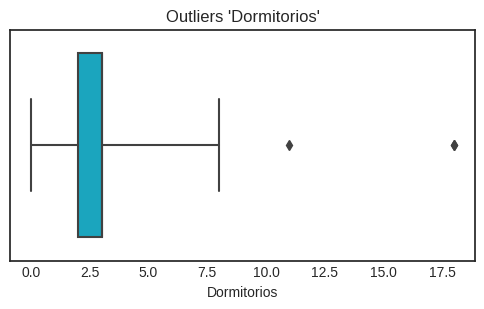

In [ ]:
#Observamos Valores Outliers en la Variable Dormitorios

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df2['Dormitorios'], whis=5, color="#00B8D9", ax=ax)
ax.set_title("Outliers 'Dormitorios'")
ax.set_xlabel("Dormitorios")

# Mostrar el gráfico
plt.show()

#Observamos algunos outliers en la variable dormitorios

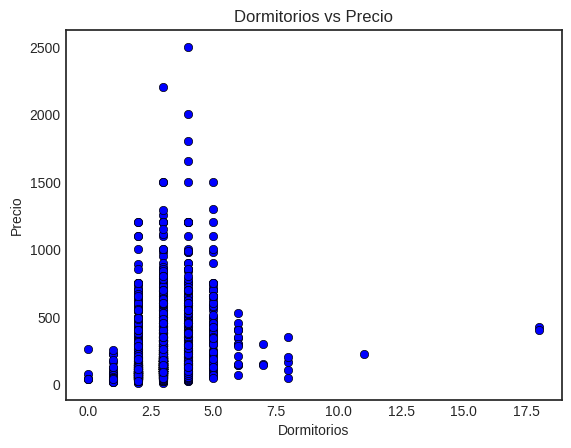

In [ ]:
plt.scatter(x=df2['Dormitorios'], y=df2['Precio'],
            color="blue", edgecolors="#000000", linewidths=0.5)
plt.xlabel("Dormitorios")
plt.ylabel("Precio")
plt.title("Dormitorios vs Precio")
plt.show()

In [ ]:
# Seleccionar las filas donde 'Dormitorios' es mayor a 6
filas_con_mas_de_6_dormitorios = df2[df2['Dormitorios'] > 6]

# Mostrar las filas seleccionadas
filas_con_mas_de_6_dormitorios

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,Ambientes,Antiguedad,Estrenar,Cochera,Estado,Luminoso,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
1836,44885901,165.000,Apart Hotel en Venta Sobre Naciones Unidas,PROPIEDAD UBICADA FRENTE A HOSPITAL PRIVADO ...,"Naciones Unidas 1, Parque Vélez Sársfield, Cór...",Parque Vélez Sársfield,200,410,2.0,8,8.0,NaN,1,NaN,0,0,-3.144265e+16,-6.419974e+16,Apart Hotel Venta Naciones Unidas,Casa
4386,48698213,150.000,Venta Casa Calle Vélez Sarsfield 4424 B° Cabo ...,Venta de casa más salón (a reciclar) Ideal inv...,"Velez Sarsfield 4424, Cabo Farina, Córdoba",Cabo Farina,340,383,4.0,7,10.0,61.0,0,NaN,0,0,-3.146196e+16,-6.420206e+16,Venta Casa Calle Vélez Sarsfield Cabo Farina,Casa
4982,47583671,300.000,Terreno Para Construir Ubicado en Bº Providenc...,TERRENO PARA CONSTRUIR UBICADO EN Bº PROVIDENC...,"Chaco 1114, Providencia, Córdoba",Providencia,604,529,1.0,7,7.0,90.0,0,NaN,0,0,-3.140014e+16,-6.419807e+16,Terreno Construir Ubicado Bº Providencia Chaco,Casa
5007,49811420,420.000,Importante Propiedad Esquina (Dean Funes y Urq...,Excelente Inmueble ubicado en calle Dean Funes...,"Dean Funes y Urquiza, Centro, Córdoba",Centro,326,650,8.0,18,NaN,60.0,0,NaN,0,0,-3.141281e+16,-6.419477e+16,Importante Propiedad Esquina Dean Funes Urquiz...,Casa
5253,48255450,225.000,Casa Para Uso Comercial - Alberdi,9 DE JULIO N° 955 a 1 cuadra de Plaza Colón (e...,"9 de julio 955, Alto Alberdi, Córdoba",Alto Alberdi,388,345,3.0,11,13.0,65.0,0,NaN,0,0,-3.141128e+16,-6.419658e+16,Casa Comercial Alberdi,Casa
5295,47119121,350.000,Dueño Vende Excelente Propiedad - Nueva Córdoba,Casa con excelente ubicación en calle Chile 28...,"Chile 286, Nueva Córdoba, Córdoba",Nueva Córdoba,251,251,3.0,8,NaN,26.0,0,NaN,0,0,-3.143109e+16,-6.418626e+16,Dueño Vende Excelente Propiedad Córdoba,Casa
6118,49276496,49.000,Se Vende Casa Av Alem,Corredor Responsable: Carlos Borra CPCPI 4900 ...,"Avenida Leandro N. Alem 200, Córdoba, Córdoba",Córdoba,115,115,2.0,8,10.0,32.0,0,NaN,0,0,-3.139856e+16,-6.417054e+16,Vende Casa Av Alem,Casa
6504,48770595,145.000,Casa Para Reciclar Alberdi 27 de Abril 7 Dorm....,ALBERDI 27 DE ABRIL Y OLEGARIO CORREA. CASA EN...,"27 De Abril 2400, Alberdi, Córdoba",Alberdi,300,200,3.0,7,9.0,25.0,0,NaN,0,0,-3.140742e+16,-6.421506e+16,Casa Reciclar Alberdi Abril Dorm Patios,Casa
6915,47910577,200.000,"Centro, Oportunidad, Casa Apta Uso Comercial. ...",Cabalen Propiedades ofrece en venta casa de 40...,"Jujuy 300, Centro, Córdoba",Centro,400,207,4.0,8,9.0,51.0,0,NaN,0,0,-3.141053e+16,-6.418937e+16,Centro Oportunidad Casa Apta Comercial Terreno...,Casa
7848,41748393,400.000,Urquiza,EXCELENTE PROPIEDAD 650 M2 14 PRIVADOS C/U C/B...,"DEAN FUNES 790, Alberdi, Córdoba",Alberdi,326,650,8.0,18,20.0,60.0,0,NaN,0,0,-3.141282e+16,-6.419459e+16,Urquiza,Casa


Analizando las publicaciones en la que la cantidad de Dormitorios es mayor a 6, concluimos que deberíamos eliminar las publicadiones en las que
la cantidad de Dormitorios sea mayor a 6 ya que son valores muy atípicos para casas en venta.

In [ ]:
df2= df2[df2['Dormitorios'] < 6]

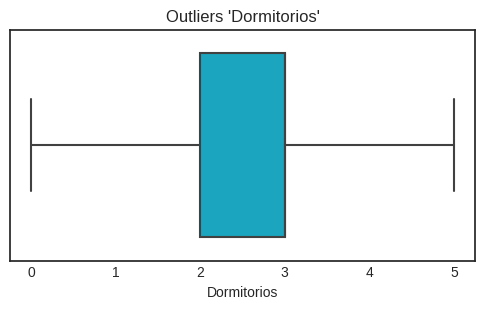

In [ ]:
#Observamos nuevamente Valores Outliers en la Variable Dormitorios

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df2['Dormitorios'], whis=5, color="#00B8D9", ax=ax)
ax.set_title("Outliers 'Dormitorios'")
ax.set_xlabel("Dormitorios")

# Mostrar el gráfico
plt.show()

#Observamos algunos outliers en la variable dormitorios

📌 **Ambiente**

In [ ]:
df2['Ambientes'].describe()

count    6089.000000
mean        5.255214
std         2.644429
min        -1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        40.000000
Name: Ambientes, dtype: float64

In [ ]:
print("Valores perdidos de la variable Ambientes:", df2['Ambientes'].isnull().sum())

Valores perdidos de la variable Ambientes: 933


In [ ]:
print("Porcentaje de Valores perdidos de la variable Ambientes:", df2['Ambientes'].isnull().sum()/len(df2)*100)

Porcentaje de Valores perdidos de la variable Ambientes: 13.286812873825122


(array([1.323e+03, 3.845e+03, 7.500e+02, 1.280e+02, 2.100e+01, 1.500e+01,
        4.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([-1. ,  3.1,  7.2, 11.3, 15.4, 19.5, 23.6, 27.7, 31.8, 35.9, 40. ]),
 <BarContainer object of 10 artists>)

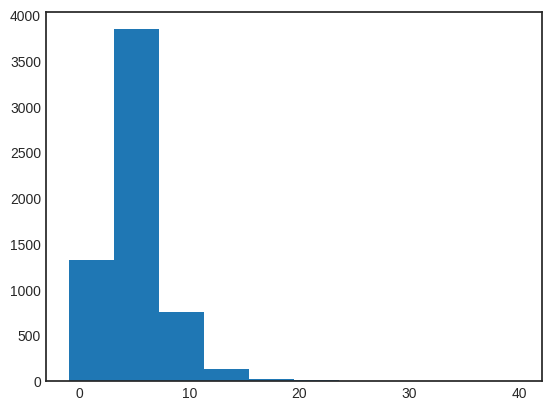

In [ ]:
#Observamos distribución de la variable Ambientes
plt.hist(df2['Ambientes'], 10)

In [ ]:
# Vamos a completar los datos faltantes de "Ambientes" con la suma del valor de "Baños" + "Dormitorios"

df2['Ambientes'] = df2['Ambientes'].fillna(df2['Banos'] + df2['Dormitorios'])

<Axes: >

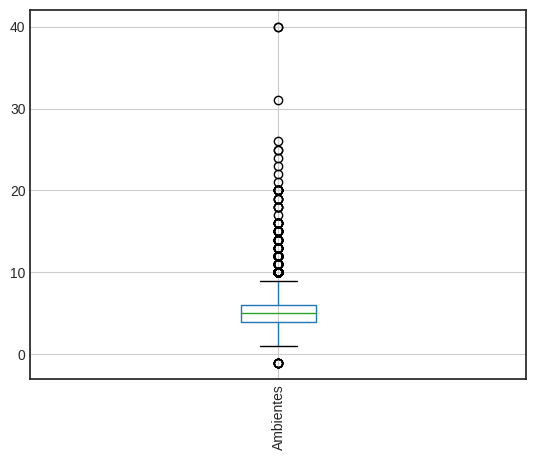

In [ ]:
#Observamos Valores Outliers en la Variable Ambientes

df2.boxplot('Ambientes',rot=90)

#Observamos algunos outliers en la variable ambientes

Luego de analizar esta variable y comprendiendo que es un campo que genera muchas interpretaciones distintas para quien publica el anuncio, se decide  desestimar de los análisis.

In [ ]:
df2.drop(columns=['Ambientes'], inplace=True)

📌 **Cocheras**

In [ ]:
df2['Cochera'].describe()

count    5114.000000
mean        1.707079
std         0.863363
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        12.000000
Name: Cochera, dtype: float64

In [ ]:
print("Valores perdidos de la variable Cocheras:", df2['Cochera'].isnull().sum())

Valores perdidos de la variable Cocheras: 1908


In [ ]:
print("Porcentaje de Valores perdidos de la variable Cocheras:", df2['Cochera'].isnull().sum()/len(df2)*100)

Porcentaje de Valores perdidos de la variable Cocheras: 27.17174594132726


In [ ]:
#Reemplazamos valores pérdidos de Cocheras por el número 0.. ya que se supone que si no lo completaron es porque no tiene cochera

df2['Cochera'] = df2['Cochera'].replace(np.nan,0)
print("Valores faltantes en Cochera luego del ajuste:", df2['Cochera'].isnull().sum())

Valores faltantes en Cochera luego del ajuste: 0


(array([4.250e+03, 2.237e+03, 3.190e+02, 1.770e+02, 1.700e+01, 1.300e+01,
        4.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

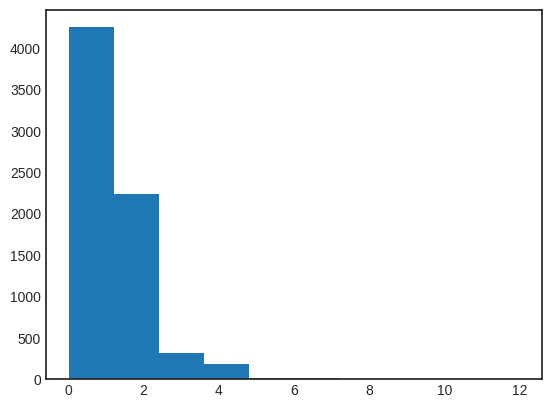

In [ ]:
#Observamos distribución de la variable Cocheras
plt.hist(df2['Cochera'], 10)

<Axes: >

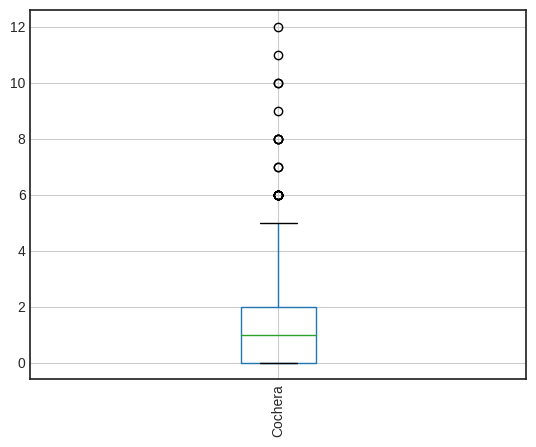

In [ ]:
#Observamos Valores Outliers en la Variable Cocheras

df2.boxplot('Cochera',rot=90)

#Observamos algunos outliers en la variable Cocheras

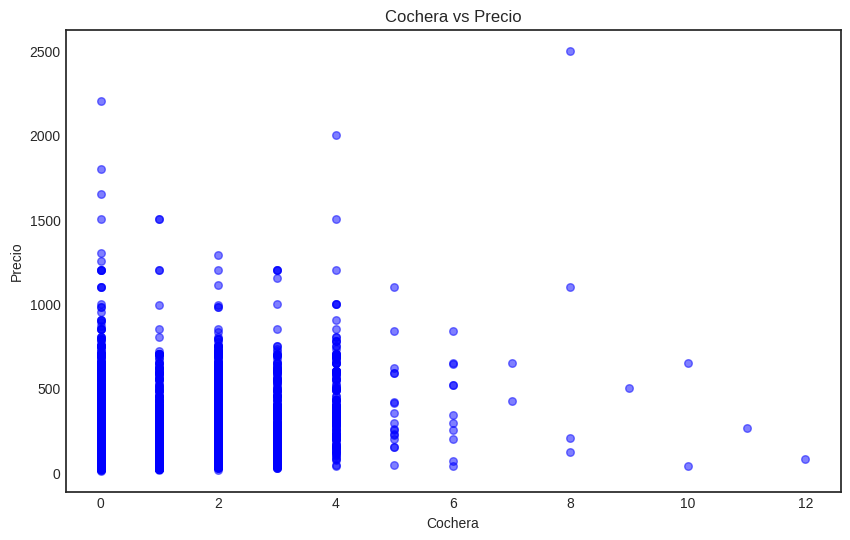

In [ ]:
# Crear un gráfico de dispersión de "Cochera" vs "Precio"
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias
plt.scatter(df2['Cochera'], df2['Precio'], s=30, c='blue', alpha=0.5)  # Ajusta el tamaño y el color de los puntos

# Etiquetas de ejes y título
plt.xlabel('Cochera')
plt.ylabel('Precio')
plt.title('Cochera vs Precio')

# Limitar los ejes para apreciar mejor el gráfico
#plt.xlim(-1, 200)
#plt.ylim(-10, 150)

# Mostrar el gráfico
plt.show()

##### ***1.6.4 📉 Análisis de Variables Cuantitativas:Antigüedad***

In [ ]:
df2['Antiguedad'].describe()

count    4733.000000
mean       35.507078
std       149.169358
min         0.000000
25%         9.000000
50%        20.000000
75%        40.000000
max      2016.000000
Name: Antiguedad, dtype: float64

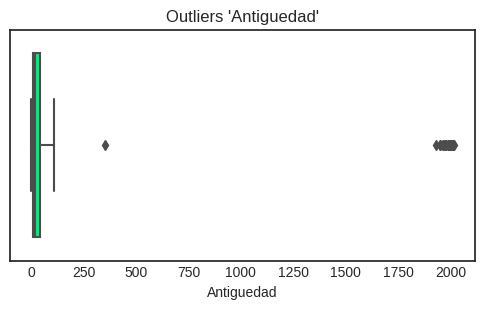

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df2['Antiguedad'], whis=5, color="#00FF7F", ax=ax)
ax.set_title("Outliers 'Antiguedad'")
ax.set_xlabel("Antiguedad")

# Mostrar el gráfico
plt.show()

In [ ]:
# Convertimos los NAN de Antiguedad en zero´s.
df2['Antiguedad'].fillna(value=0, inplace=True)

In [ ]:
# Definir una función para restar 2022 a valores mayores a 500
def restar_antiguedad(valor):
    if valor > 500:
        return 2022 - valor
    else:
        return valor

# Aplicar la función a la columna 'Antiguedad' de df2
df2['Antiguedad'] = df2['Antiguedad'].apply(restar_antiguedad)

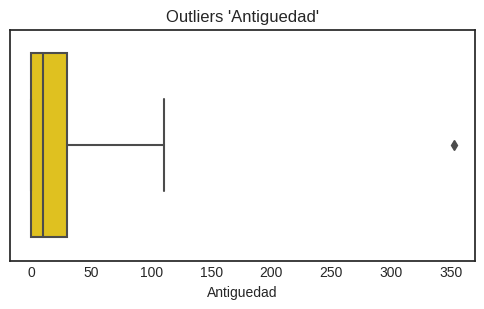

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df2['Antiguedad'], whis=5, color="#FFD700", ax=ax)
ax.set_title("Outliers 'Antiguedad'")
ax.set_xlabel("Antiguedad")

# Mostrar el gráfico
plt.show()

In [ ]:
# Conteo de los zero´s en Antiguedad
df2['Antiguedad'].isnull().sum()

0

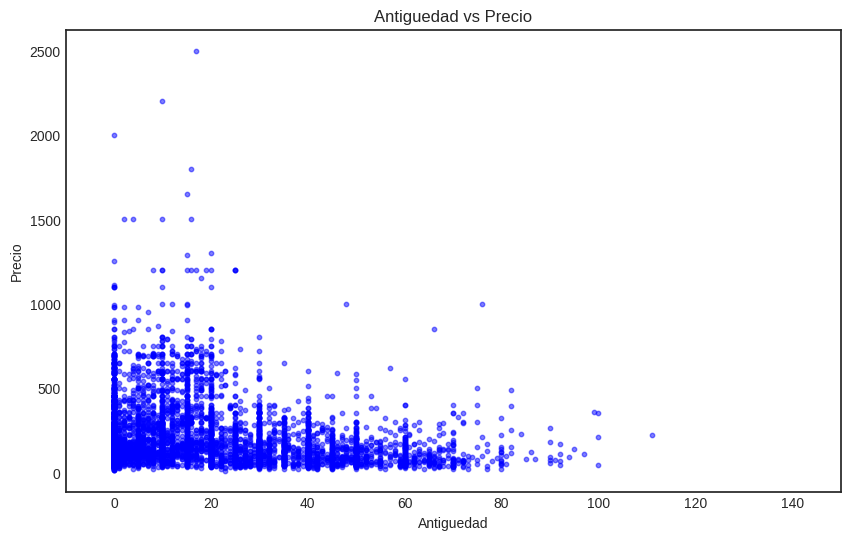

In [ ]:
# Crear un gráfico de dispersión de "Antiguedad" vs "Precio"
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias
plt.scatter(df2['Antiguedad'], df2['Precio'], s=10, c='blue', alpha=0.5)  # Ajusta el tamaño y el color de los puntos

# Etiquetas de ejes y título
plt.xlabel('Antiguedad')
plt.ylabel('Precio')
plt.title('Antiguedad vs Precio')

# Limitar los ejes para apreciar mejor el gráfico
#plt.ylim(-1, 1500)
plt.xlim(-10, 150)

# Mostrar el gráfico
plt.show()

In [ ]:
# Scatter Plot para visualizar la relación entre Antigüedad Vs Precio
fig9 = px.scatter(df2[df2['Antiguedad'] < 300], x='Antiguedad', y='Precio', title='Antiguedad vs Precio', color='Antiguedad', color_continuous_scale=px.colors.sequential.Purp)

fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))

fig9.show()

In [ ]:
filtro=df2[df2['Antiguedad'] > 300]
filtro

,idPost,Precio,title,Description,direccion,barrio,m2total,m2cubierto,Banos,Dormitorios,Antiguedad,Estrenar,Cochera,Estado,Luminoso,coordenadas.lat,coordenadas.lng,terminos_relevantes,Type
7929,49749491,80.0,Vendo Casa a m Ricardo Rojas Arguello,Corredor Responsable: Matiaz Ruiz Moreno CPCPI...,"Mocovíes 7500, Argüello, Córdoba",Argüello,412,160,2.0,4,352.0,0,2.0,0,0,-3.133206e+16,-6.426461e+16,Vendo Casa Ricardo Rojas Arguello,Casa


##### ***1.6.5 📉 Análisis de Variables Cuantitativas: Estrenar***

In [ ]:
df2['Estrenar'].describe()

count    7022.000000
mean        0.382227
std         0.485966
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Estrenar, dtype: float64

In [ ]:
# Teste 'Estrenar'
import math

count_zero = 0
count_one = 0
count_desconocida = 0

for iterador in df2['Estrenar']:
  if iterador == 0:
    count_zero += 1
  elif iterador == 1:
    count_one += 1
  else:
    count_desconocida += 1

print('Cantidad de ceros: {}'.format(count_zero))
print('Cantidad de unos: {}'.format(count_one))
print('Cantidad de variables desconcidas: {}'.format(count_desconocida))
print('Sumatoria ceros + unos: {}'.format(count_zero + count_one))

Cantidad de ceros: 4338
Cantidad de unos: 2684
Cantidad de variables desconcidas: 0
Sumatoria ceros + unos: 7022


##### ***1.6.6 📉 Análisis de Variables Cuantitativas: Estado***

In [ ]:
df2['Estado']

0       0
1       0
2       0
3       0
4       0
       ..
7958    0
7960    0
7962    0
7963    0
7965    0
Name: Estado, Length: 7022, dtype: int64

In [ ]:
df2['Estado'].count()

7022

In [ ]:
# Teste 'Estado'
import math

count_zero = 0
count_one = 0
count_desconocida = 0

for iterador in df2['Estado']:
  if iterador == 0:
    count_zero += 1
  elif iterador == 1:
    count_one += 1
  else:
    count_desconocida += 1

print('Cantidad de ceros: {}'.format(count_zero))
print('Cantidad de unos: {}'.format(count_one))
print('Cantidad de variables desconcidas: {}'.format(count_desconocida))
print('Sumatoria ceros + unos: {}'.format(count_zero + count_one))

Cantidad de ceros: 6870
Cantidad de unos: 152
Cantidad de variables desconcidas: 0
Sumatoria ceros + unos: 7022


In [ ]:
df2.isnull().sum()

idPost                  0
Precio                  0
title                   0
Description             7
direccion              34
barrio                 34
m2total                 0
m2cubierto              0
Banos                   0
Dormitorios             0
Antiguedad              0
Estrenar                0
Cochera                 0
Estado                  0
Luminoso                0
coordenadas.lat        58
coordenadas.lng        58
terminos_relevantes     0
Type                    0
dtype: int64

#### ***1.7 📉 Análisis Unidimensional de Variables Categóricas***

📌 **Barrios**

In [ ]:
#Frecuencia absoluta simple de la variable Barrios

pd.value_counts(df2['barrio'])

#Observamos que hay 1.055 publicaciones donde el Barrio es "Córdoba".. esto es incorrecto. VER COMO RESOLVERLO

 Córdoba               1047
 Villa Belgrano         275
 Argüello               237
 Cerro de las Rosas     190
 URCA                   182
                       ... 
 Saldán                   1
  Villa Belgrano          1
 VIlla Alberdi            1
 Villa Martínez           1
 Ameghino Norte           1
Name: barrio, Length: 357, dtype: int64

In [ ]:
#Frecuencia relativa simple de la variable Barrios
barrios_mayor_2percent = (100 * df2['barrio'].value_counts() / len(df2['barrio'])) > 2

df2_barrio = 100 * df2['barrio'].value_counts() / len(df2['barrio'])
df2_barrio

 Córdoba               14.910282
 Villa Belgrano         3.916263
 Argüello               3.375107
 Cerro de las Rosas     2.705782
 URCA                   2.591854
                         ...    
 Saldán                 0.014241
  Villa Belgrano        0.014241
 VIlla Alberdi          0.014241
 Villa Martínez         0.014241
 Ameghino Norte         0.014241
Name: barrio, Length: 357, dtype: float64

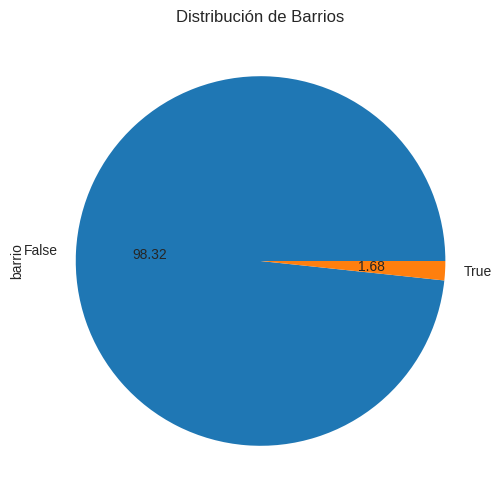

In [ ]:
#plot = df2['barrio'].value_counts().plot(kind='bar',
                                         #   title='Distribución de Barrios')

plot = barrios_mayor_2percent.value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Distribución de Barrios')

Podemos ver que sólo el 1,65% de barrios posee una proporción mayor al 2% de la cantidad total de barrios.

📌 **Dscription**

In [ ]:
# Crear una función para procesar el texto y extraer términos relevantes
def extraer_terminos_relevantes(texto):
    if isinstance(texto, str):
        texto= texto.lower() #Convertir el texto a minúscula
        doc = nlp(texto)
        terminos_relevantes = [token.text for token in doc if not token.is_stop and token.is_alpha]
        return " ".join(terminos_relevantes)
    else:
        return ""  # O cualquier otro valor adecuado para indicar que no hay texto

# Aplicar la función a la columna 'title' y almacenar los resultados en una nueva columna
df2['desc_relevante'] = df2['Description'].apply(extraer_terminos_relevantes)

In [ ]:
# Función para excluir palabras con menos de 2 letras
def excluir_palabras_cortas2(texto):
    if isinstance(texto, str):
        palabras = texto.split()
        palabras_filtradas = [palabra for palabra in palabras if len(palabra) >= 2]
        return " ".join(palabras_filtradas)
    else:
        return ""

# Aplicar la función a la columna 'desc_relevante' de tu DataFrame df2
df2['desc_relevante'] = df2['desc_relevante'].apply(excluir_palabras_cortas2)

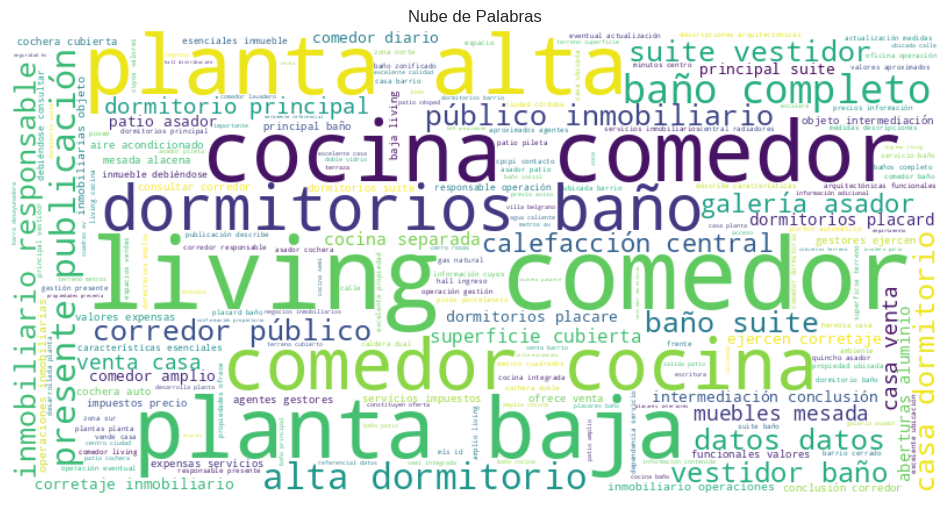

In [ ]:
from wordcloud import WordCloud

palabras2 = " ".join(df2['desc_relevante']).split()

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palabras2))

# Mostrar la nube de palabras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

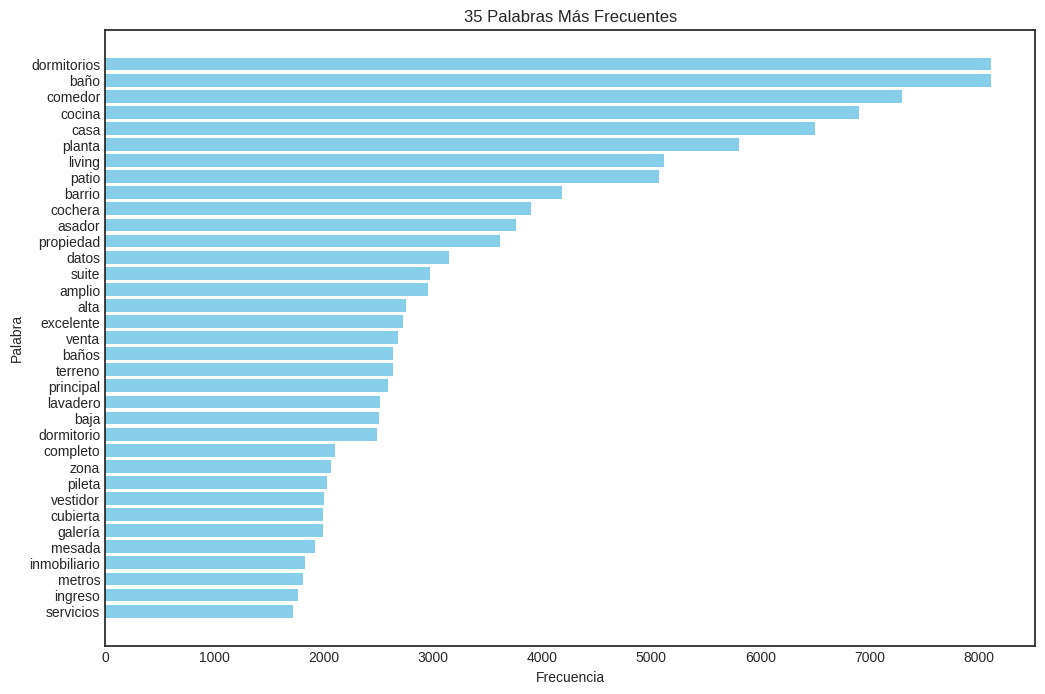

In [ ]:
from collections import Counter

# Definir el valor de X, es decir, cuántas palabras más frecuentes queremos mostrar
X = 35

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras2)

# Seleccionar las X palabras más frecuentes
top_X_palabras = frecuencia_palabras.most_common(X)
palabras, frecuencias = zip(*top_X_palabras)

# Crear un gráfico de barras horizontal con las X palabras más frecuentes
plt.figure(figsize=(12, 8))
plt.barh(palabras, frecuencias, color='skyblue')
plt.title(f'{X} Palabras Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra más frecuente esté en la parte superior
plt.show()

Se tratará de indentificar cuáles son las palabras que más se repiten para los pisos en los que el precio de la publicación pertenezcan al cuartil 75% y 25%.

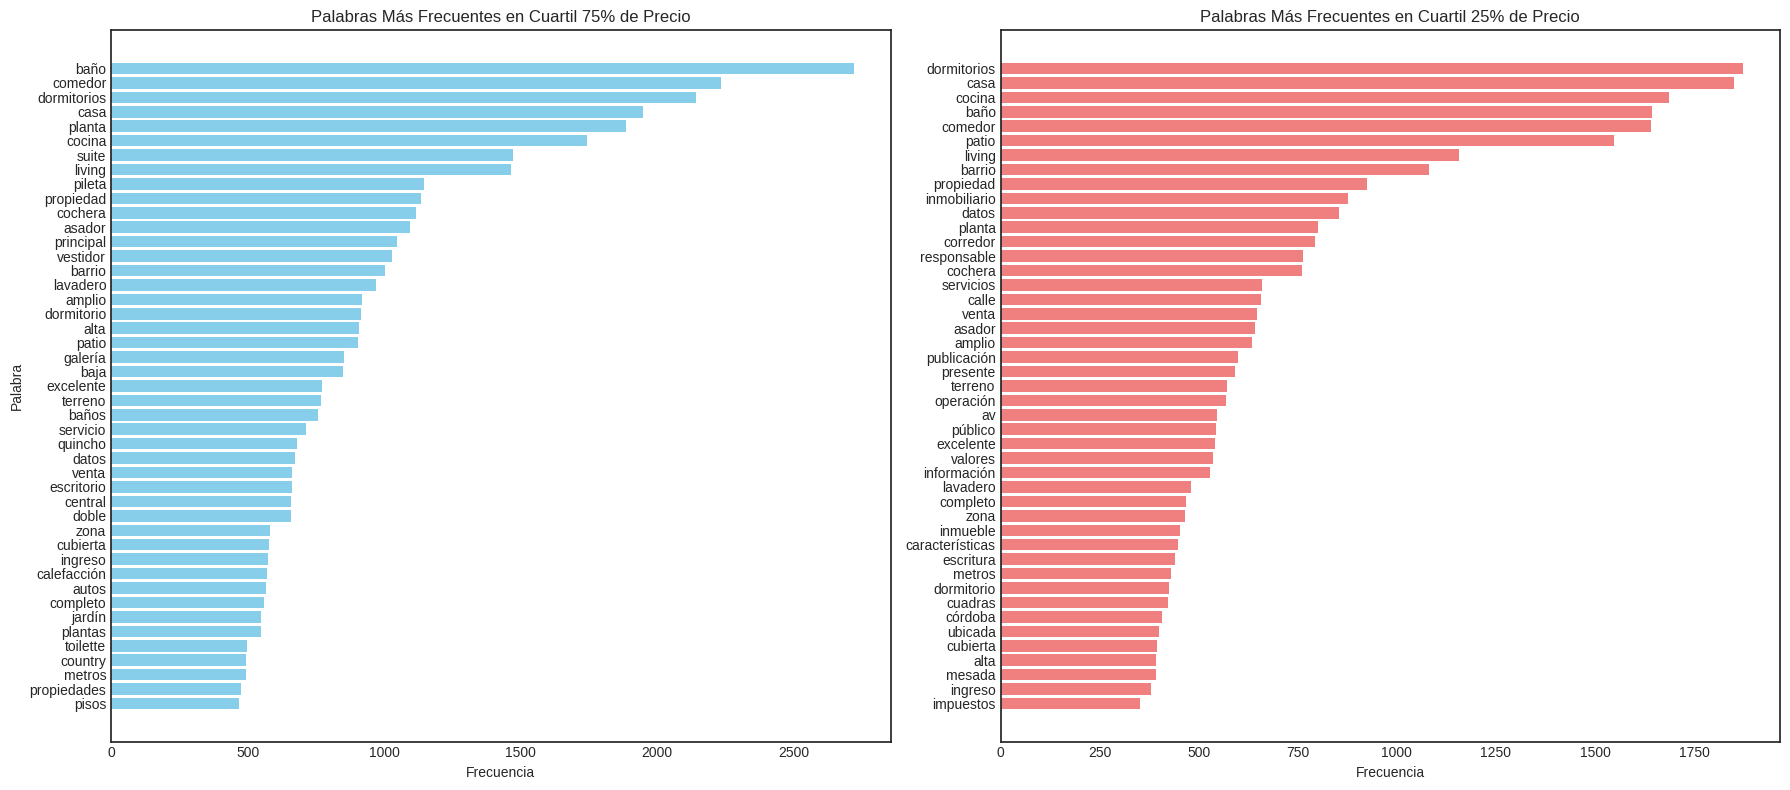

In [ ]:
from collections import Counter

# Determina los cuartiles 25% y 75% de los precios
cuartil_25 = df2['Precio'].quantile(0.25)
cuartil_75 = df2['Precio'].quantile(0.75)

# Filtra el DataFrame para obtener solo las filas donde el Precio está en el cuartil 25%
df_cuartil_25 = df2[df2['Precio'] <= cuartil_25]
df_cuartil_75 = df2[df2['Precio'] >= cuartil_75]

# Combina todas las palabras relevantes de las filas seleccionadas en un solo texto
texto_cuartil_25 = ' '.join(df_cuartil_25['desc_relevante'].tolist())
texto_cuartil_75 = ' '.join(df_cuartil_75['desc_relevante'].tolist())

# Divide el texto en palabras
palabras_cuartil_25 = texto_cuartil_25.split()
palabras_cuartil_75 = texto_cuartil_75.split()

# Contar la frecuencia de cada palabra
frecuencia_palabras_cuartil_75= Counter(palabras_cuartil_75)
frecuencia_palabras_cuartil_25 = Counter(palabras_cuartil_25)

# Definir el valor de X, es decir, cuántas palabras más frecuentes queremos mostrar
X = 45

# Seleccionar las X palabras más frecuentes del cuartil 75%
top_X_palabras_cuartil_75 = frecuencia_palabras_cuartil_75.most_common(X)
palabras_75, frecuencias_75 = zip(*top_X_palabras_cuartil_75)

# Seleccionar las X palabras más frecuentes del cuartil 25%
top_X_palabras_cuartil_25 = frecuencia_palabras_cuartil_25.most_common(X)
palabras_25, frecuencias_25 = zip(*top_X_palabras_cuartil_25)

# Crear un gráfico de barras horizontal con las X palabras más frecuentes
plt.figure(figsize=(18, 8))

# Gráfico del cuartil 75%
plt.subplot(1, 2, 1)
plt.barh(palabras_75, frecuencias_75, color='skyblue')
plt.title(f'Palabras Más Frecuentes en Cuartil 75% de Precio')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra más frecuente esté en la parte superior

# Gráfico del cuartil 25%
plt.subplot(1, 2, 2)
plt.barh(palabras_25, frecuencias_25, color='lightcoral')
plt.title(f'Palabras Más Frecuentes en Cuartil 25% de Precio')
plt.xlabel('Frecuencia')
plt.gca().invert_yaxis()  # Invertir el eje y

plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

A continuación se realiza un gráfico en el que se pueda ver cuáles son las combinaciones de palabras que acompañan a la palabra "Suite" a partir de nuestra variable df2['desc_relevante']

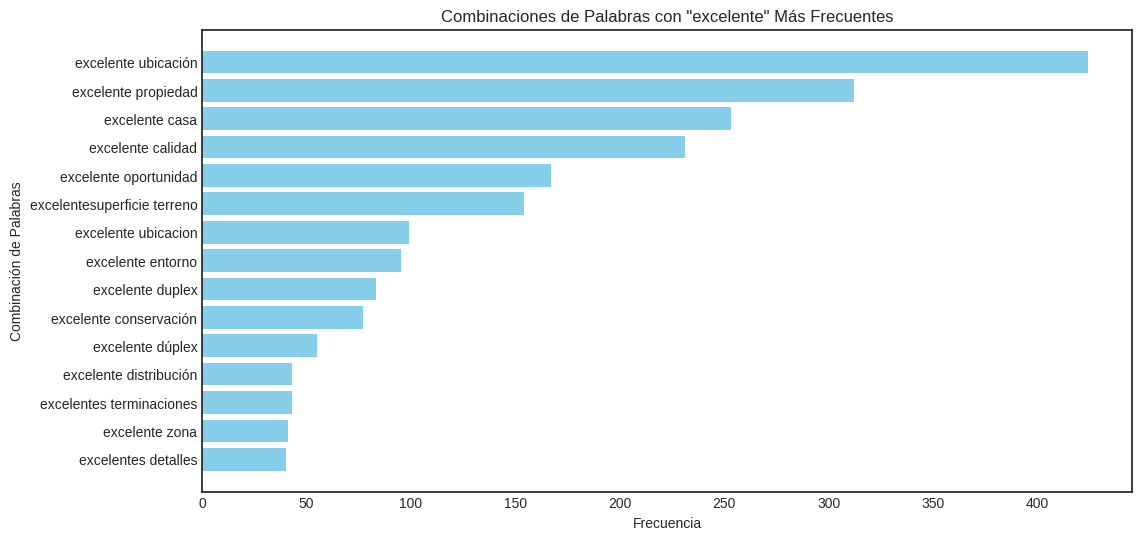

In [ ]:
from collections import Counter

word = 'excelente'

# Función para encontrar combinaciones de palabras con "excelente"
def encontrar_combinaciones(texto):
    # Tokeniza el texto y encuentra combinaciones con "excelente"
    palabras = texto.split()
    combinaciones_con_excelente = [palabras[i] + " " + palabras[i+1] for i in range(len(palabras)-1) if word in palabras[i]]
    return combinaciones_con_excelente

# Aplicar la función y combinar todas las combinaciones en una lista
todas_combinaciones = [combo for texto in df2['desc_relevante'] for combo in encontrar_combinaciones(texto)]

# Contar la frecuencia de cada combinación
frecuencia_combinaciones = Counter(todas_combinaciones)

# Definir cuántas combinaciones deseas mostrar
X = 15  # Cambia este valor según tus preferencias

# Seleccionar las X combinaciones más frecuentes
top_X_combinaciones = frecuencia_combinaciones.most_common(X)
combinaciones, frecuencias = zip(*top_X_combinaciones)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(12, 6))
plt.barh(combinaciones, frecuencias, color='skyblue')
plt.title(f'Combinaciones de Palabras con "{word}" Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Combinación de Palabras')
plt.gca().invert_yaxis()  # Invertir el eje y para que la combinación más frecuente esté en la parte superior
plt.show()

In [ ]:
# Filtrar las filas donde 'Description' contiene la palabra "suite"
filas_con_suite = df2[df2['Description'].str.contains("suite", case=False, na=False)]

# Seleccionar 5 filas aleatorias de las que contienen "suite"
if len(filas_con_suite) > 5:
    filas_ejemplo = filas_con_suite.sample(5)
else:
    filas_ejemplo = filas_con_suite

# Imprimir las 5 filas de ejemplo
filas_ejemplo[['Description']]

,Description
2403,PRECIO RETASADOMuy lindas casas a estrenar en ...
489,Propiedad en inmejorable zona de La Carolina c...
6193,Becken Propiedades ofrece vivienda de tres dor...
7596,•Casa de categoría desarrollada en dos platas ...
1167,Impecable casa ubicada en la zona de Plaza Arg...


In [ ]:
# Agregar columnas dummies
df2['Suite'] = df2['desc_relevante'].str.contains("suite", case=False, na=False)
df2['Pileta'] = df2['desc_relevante'].str.contains("pileta", case=False, na=False)
df2['Patio'] = df2['desc_relevante'].str.contains("patio", case=False, na=False)
df2['Oportunidad'] = df2['terminos_relevantes'].str.contains("oportunidad", case=False, na=False)
df2['Reciclar'] = df2['terminos_relevantes'].str.contains("reciclar", case=False, na=False)
df2['Country'] = (df2['desc_relevante'].str.contains("country", case=False, na=False) |
                  df2['terminos_relevantes'].str.contains("country", case=False, na=False))
df2['Exc_ubi'] = (df2['desc_relevante'].str.contains("excelente", case=False, na=False) &
                  (df2['desc_relevante'].str.contains("ubicacion", case=False, na=False) |
                   df2['desc_relevante'].str.contains("ubicación", case=False, na=False) |
                   df2['desc_relevante'].str.contains("zona", case=False, na=False)))

# Convertir las columnas dummies en tipo booleano
columnas_dummies = ['Suite', 'Pileta', 'Patio', 'Oportunidad', 'Reciclar', 'Country', 'Exc_ubi']
df2[columnas_dummies] = df2[columnas_dummies].astype(bool)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7022 entries, 0 to 7965
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idPost               7022 non-null   int64  
 1   Precio               7022 non-null   float64
 2   title                7022 non-null   object 
 3   Description          7015 non-null   object 
 4   direccion            6988 non-null   object 
 5   barrio               6988 non-null   object 
 6   m2total              7022 non-null   Int64  
 7   m2cubierto           7022 non-null   Int64  
 8   Banos                7022 non-null   float64
 9   Dormitorios          7022 non-null   int64  
 10  Antiguedad           7022 non-null   float64
 11  Estrenar             7022 non-null   int64  
 12  Cochera              7022 non-null   float64
 13  Estado               7022 non-null   int64  
 14  Luminoso             7022 non-null   int64  
 15  coordenadas.lat      6964 non-null   f

Ahora se realizá un breve análisis de las variables categóricas del dataset.

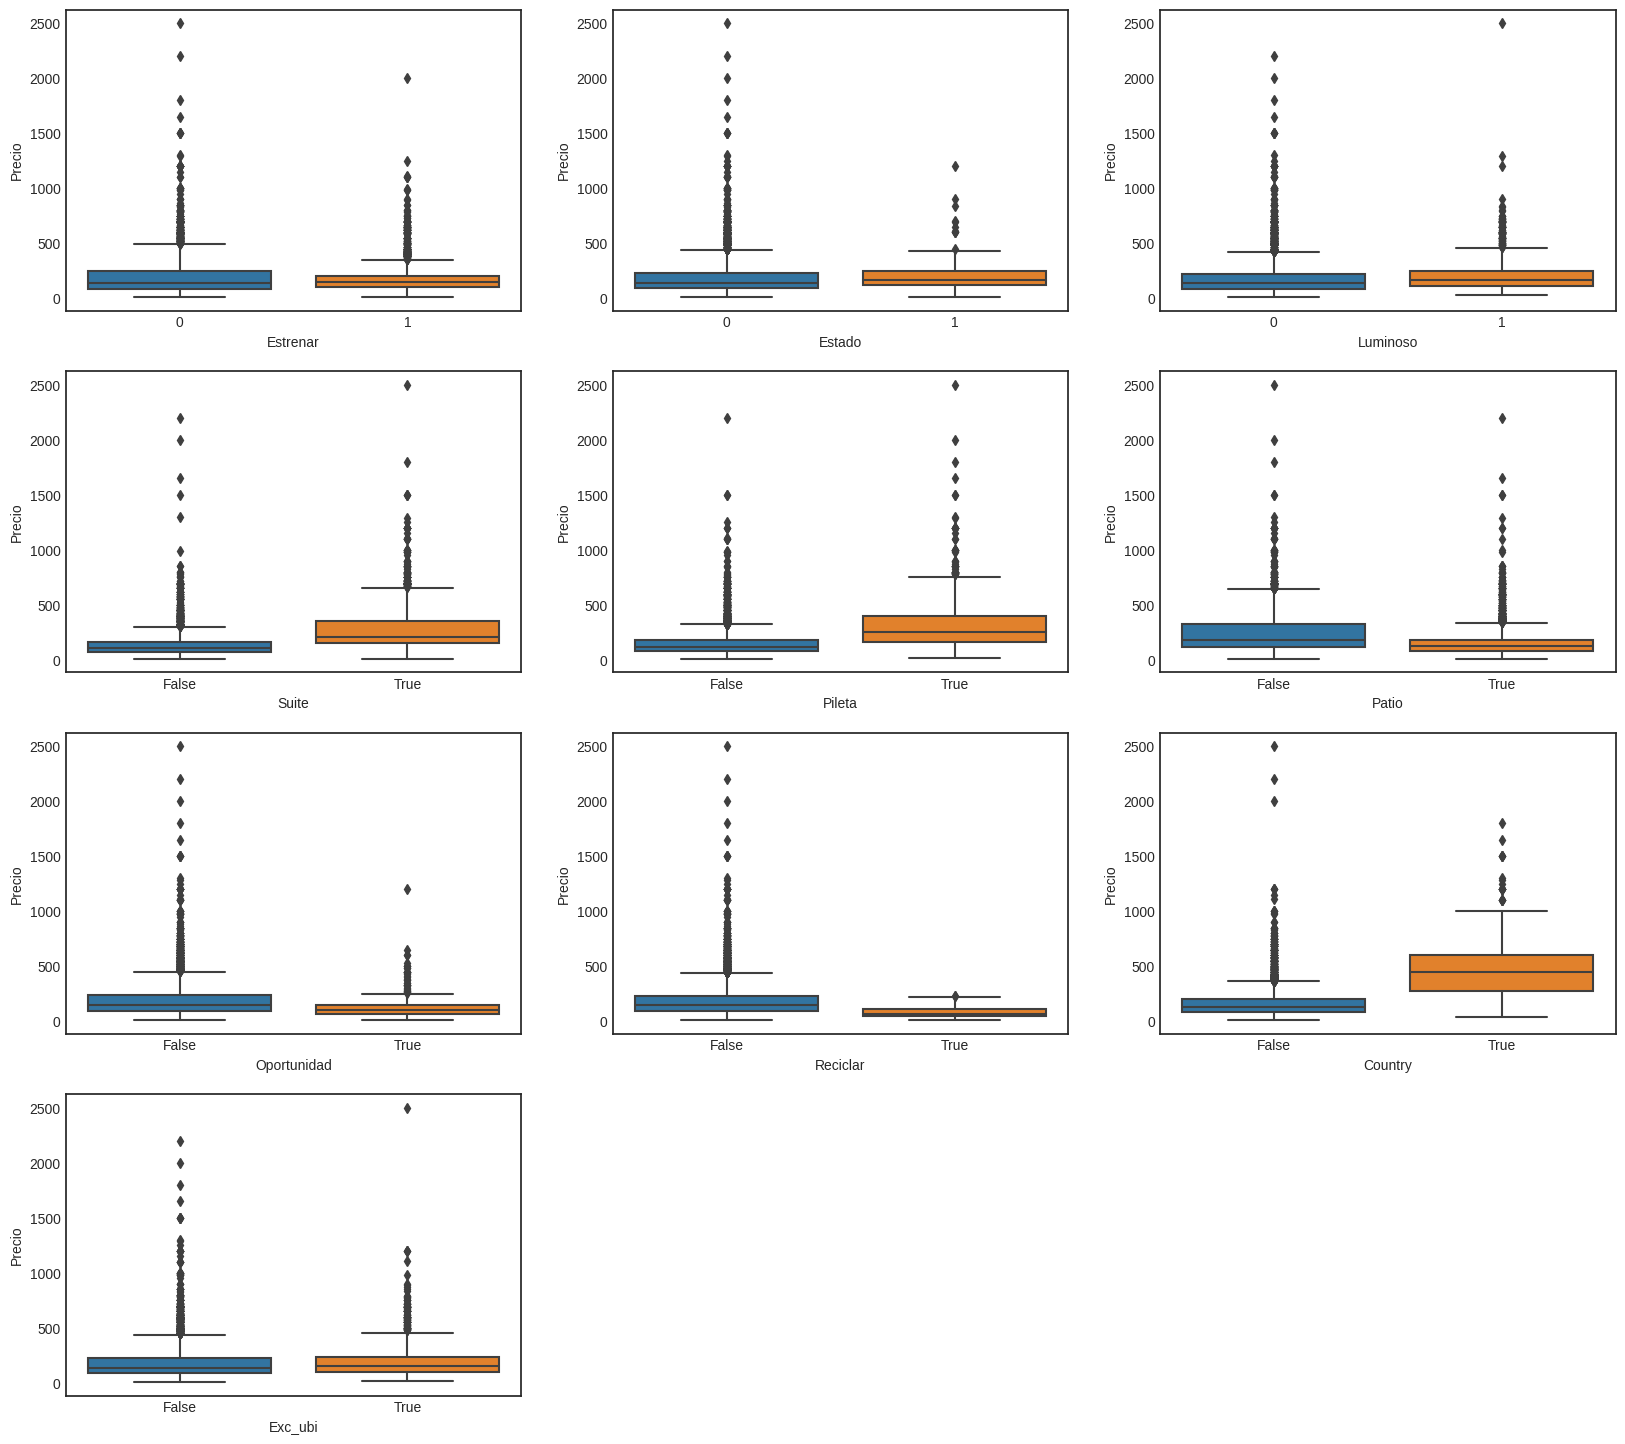

In [ ]:
plt.figure(figsize=(20, 18))
plt.subplot(4,3,1)
sns.boxplot(x = 'Estrenar', y = 'Precio', data = df2)
plt.subplot(4,3,2)
sns.boxplot(x = 'Estado', y = 'Precio', data = df2)
plt.subplot(4,3,3)
sns.boxplot(x = 'Luminoso', y = 'Precio', data = df2)
plt.subplot(4,3,4)
sns.boxplot(x = 'Suite', y = 'Precio', data = df2)
plt.subplot(4,3,5)
sns.boxplot(x = 'Pileta', y = 'Precio', data = df2)
plt.subplot(4,3,6)
sns.boxplot(x = 'Patio', y = 'Precio', data = df2)
plt.subplot(4,3,7)
sns.boxplot(x = 'Oportunidad', y = 'Precio', data = df2)
plt.subplot(4,3,8)
sns.boxplot(x = 'Reciclar', y = 'Precio', data = df2)
plt.subplot(4,3,9)
sns.boxplot(x = 'Country', y = 'Precio', data = df2)
plt.subplot(4,3,10)
sns.boxplot(x = 'Exc_ubi', y = 'Precio', data = df2)
plt.show()

In [ ]:
from google.colab import files

df2.to_excel("df2.xlsx", index=False)
files.download("df2.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se continuará con el proceso en el siguiente Colab.